<a href="https://colab.research.google.com/github/Ana-9maria1/Equipo2-analitica/blob/main/Caso_de_estudio_Aprendizaje_Supervisado_Aguirre_Arcila_Manco_Ospina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrega de caso de estudio: **Aprendizaje supervisado**.

Integrantes:

**Alejandra Aguirre Monsalve**

**Faber Esteban Arcila Galvis**

**Daniel Alejandro Manco Vidales**

**Ana Maria Ospina Arredondo**

**Información sobre el caso de estudio**.

Caso de estudio
La agencia de marketing Sterling Cooper Advertising tiene en su planta de empleados alrededor de 4000 personas directamente contratadas. Sin embargo, el departamento de recursos humanos ha reportado cifras preocupantes a la dirección de la agencia, indicando que cada año, alrededor del 15% de sus empleados abandonan la empresa y necesitan ser reemplazados, en la mayoría de casos, con muy poco tiempo para el proceso de selección y contratación. La dirección cree que este nivel de bajas (empleados que se marchan, ya sea por decisión propia o porque son despedidos) es perjudicial para la empresa, por las siguientes razones:

● Los proyectos de los antiguos empleados se retrasan, lo que dificulta el cumplimiento de los plazos, con la consiguiente pérdida de reputación entre sus clientes y socios.

● El departamento de recursos humanos requiere mucha inversión por los niveles de rotación, así que la mayoría de su personal está dedicado a tareas de reclutamiento de nuevo talento, haciendo más lento el proceso de desarrollo de otras áreas dentro del departamento dedicadas por ejemplo a la formación o bienestar de sus empleados.

● En la mayoría de los casos, hay que formar a los nuevos empleados para el puesto y/o darles tiempo para que se adapten a la cultura de la agencia. Por ello, la dirección ha contratado a su equipo de consultores para saber en qué factores deben centrarse para frenar el abandono de empleados. En otras palabras, quieren predecir a tiempo si sus empleados van a abandonar su empleo para tomar acciones preventivas que les permita retener a la mayoría de los empleados en riesgo. También quieren saber cuál de estas variables es la más importante y debe abordarse de inmediato.

Datos disponibles
Para abordar el problema descrito cuenta con las siguientes bases de datos:

● general_data: Información general del empleado

● employee_survey_data: resultados de encuesta realizada a los empleados respecto a su nivel de satisfacción con su empleo actual

● manager_survey_data: resultados obtenidos por los empleados en su última evaluación de desempeño.

● time_work: contiene el tiempo promedio de dedicación del empleado al día.

# **Análisis exploratorio de datos**

In [ ]:
#conectamos drive para leer las bases de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importamos las librerías necesarias
import pandas as pd
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, classification_report
from sklearn.feature_selection import SelectFromModel, f_classif, SelectKBest
from sklearn import tree
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



pd.set_option('display.max_columns', None) #muestra todas las columnas de tablas
%matplotlib inline

In [ ]:
def impute_columns(df, columns, strategy): #Función que imputa datos para variables numéricas
  imputer = SimpleImputer(strategy=strategy)
  for column in columns:
    column_imputed = imputer.fit_transform(df[column].values.reshape(-1, 1))
    df[column] = column_imputed.flatten()
  return df

def ct(columns):
  ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [columns])], remainder='passthrough')
  X = np.array(ct.fit_transform(X))
  return ct

In [ ]:
gd = pd.read_csv('/content/drive/MyDrive/Bases entrega 1/general_data.csv') ##Información general del empleado
esd=pd.read_csv('/content/drive/MyDrive/Bases entrega 1/employee_survey_data.csv')##Resultados de encuesta realizada a los empleados respecto a su nivel de satisfacción con su empleo actual
msd = pd.read_csv('/content/drive/MyDrive/Bases entrega 1/manager_survey_data.csv')##Resultados obtenidos por los empleados en su última evaluación de desempeño.
tw = pd.read_csv('/content/drive/MyDrive/Bases entrega 1/time_work.csv',encoding='latin-1',sep =';', decimal= ',')## contiene el tiempo promedio de dedicación del empleado al día.


In [ ]:
#Se convierten todas las columnas de las bases de datos a minúscula para estandarizar y disminuir errores en el código
gd.columns = gd.columns.str.lower()
esd.columns = esd.columns.str.lower()
msd.columns = msd.columns.str.lower()
tw.columns = tw.columns.str.lower()

**Exploración bases de datos**


INFORMACIÓN GENERAL DEL EMPLEADO: general_data

In [ ]:
gd.head() # se hace una observación del DF gd

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,over18,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


Age: Edad del empleado en años.

Attrition: Indica si el empleado dejó la compañía o no. Los valores posibles son "Yes" y "No".

BusinessTravel: Frecuencia de los viajes de negocios del empleado. Los valores posibles son "Travel_Rarely", "Travel_Frequently" y "Non-Travel".

Department: Departamento donde trabaja el empleado. Los valores posibles son "Sales", "Research & Development" y "Human Resources".

DistanceFromHome: Distancia del hogar del empleado al lugar de trabajo.

Education: Nivel educativo del empleado. Los valores posibles van de 1 (menos educación) a 5 (más educación).

EducationField: Campo de estudio del empleado. Los valores posibles son "Life Sciences", "Other", "Medical", "Marketing", "Technical Degree" y "Human Resources".

EmployeeCount: Constante con valor 1 que indica el número de empleados en cada registro.

EmployeeID: ID único del empleado.

Gender: Género del empleado. Los valores posibles son "Male" y "Female".

JobLevel: Nivel laboral del empleado. Los valores posibles van de 1 (puesto más bajo) a 5 (puesto más alto).

JobRole: Rol laboral del empleado. Los valores posibles son "Sales Executive", "Research Scientist", "Laboratory Technician", "Manufacturing Director", "Healthcare Representative", "Manager", "Sales Representative", "Research Director", "Human Resources" y "Manager".

MaritalStatus: Estado civil del empleado. Los valores posibles son "Single", "Married" y "Divorced".

MonthlyIncome: Ingreso mensual del empleado en dólares estadounidenses.

NumCompaniesWorked: Número de compañías en las que el empleado ha trabajado antes de unirse a la actual.

Over18: Constante con valor "Yes" que indica si el empleado es mayor de 18 años.

PercentSalaryHike: Porcentaje de aumento en el salario del empleado en el último año.

StandardHours: Constante con valor 80 que indica el número estándar de horas trabajadas por semana.

StockOptionLevel: Nivel de opciones de compra de acciones otorgadas al empleado. Los valores posibles van de 0 (ninguna opción otorgada) a 3 (máximo nivel de opciones otorgadas).

TotalWorkingYears: Total de años de experiencia laboral del empleado.

TrainingTimesLastYear: Número de veces que el empleado asistió a programas de capacitación en el último año.

YearsAtCompany: Años que el empleado ha trabajado en la compañía actual.

YearsSinceLastPromotion: Años desde la última promoción del empleado.

YearsWithCurrManager: Años que el empleado ha estado bajo la supervisión del gerente actual.

RESULTADOS DE ENCUESTA DE SATISFACCIÓN: employee_survey_data

In [ ]:
esd.head()

,employeeid,environmentsatisfaction,jobsatisfaction,worklifebalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


EmployeeID: ID unico del empeleado

EnvironmentSatisfaction: Nivel de satisfacion del entorno de trabajo. Los posibles valores son "1"(Bajo) a "4" (Muy alto).

JobSatisfaction: Nivel de satisfaccion laboral. Los valores son "1" (Bajo) a "4"(Muy alto).

WorkLifeBalance: Nivel de conciliación de la vida laboral y familiar. Los posibles valores son "1" (Mala) a "4" (La mejor)

RESULTADOS DE EVALUACIÓN DE DESEMPEÑO: manager_survey_data

In [ ]:
msd.head()

,employeeid,jobinvolvement,performancerating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


EmployeeID: ID único del empleado

JobInvolvement: Nivel de implicación en el trabajo. Los posibles valores van de "1" (Bajo) a "4" (Muy alto).

PerformanceRating: Valoración del rendimiento en el último año. Los posibles valores van de "1" (Bajo) a "4" (Sobresaliente).

TIEMPO DE DEDICACIÓN DEL EMPLEADO: time_work

In [ ]:
tw.head()

,employeeid,mean_time
0,1,6.8702
1,2,7.3160
2,3,6.8161
3,4,6.7892
4,5,7.8776


EmployeeID: ID único del empleado

mean_time: Tiempo medio de dedicación del empleado a su labor

Se verifican los tamaños de las bases de datos

In [ ]:
print(gd.shape)#se consulta el tamaño del DF

(4410, 24)


In [ ]:
print(esd.shape)#se consulta el tamaño del DF

(4410, 4)


In [ ]:
print(msd.shape)#se consulta el tamaño del DF

(4410, 3)


In [ ]:
print(tw.shape)#se consulta el tamaño del DF

(4410, 2)


# **Limpieza y transformación**

Se hará la imputación antes de unir los DF entre sí ya que la unión con datos nulos puede hacer que se sumen unos a otros y se creen nuevas filas de nulos en el DF final.

Se verifica la información y el tipo de dato que contiene cada una de las variables de las bases de datos

In [ ]:
gd.info() #Se consulta información general del DF gd donde encontramos algunos nulos en 2 de las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4410 non-null   int64  
 1   attrition                4410 non-null   object 
 2   businesstravel           4410 non-null   object 
 3   department               4410 non-null   object 
 4   distancefromhome         4410 non-null   int64  
 5   education                4410 non-null   int64  
 6   educationfield           4410 non-null   object 
 7   employeecount            4410 non-null   int64  
 8   employeeid               4410 non-null   int64  
 9   gender                   4410 non-null   object 
 10  joblevel                 4410 non-null   int64  
 11  jobrole                  4410 non-null   object 
 12  maritalstatus            4410 non-null   object 
 13  monthlyincome            4410 non-null   int64  
 14  numcompaniesworked      

In [ ]:
esd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employeeid               4410 non-null   int64  
 1   environmentsatisfaction  4385 non-null   float64
 2   jobsatisfaction          4390 non-null   float64
 3   worklifebalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
msd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   employeeid         4410 non-null   int64
 1   jobinvolvement     4410 non-null   int64
 2   performancerating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [ ]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   employeeid  4410 non-null   int64  
 1   mean_time   4410 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 69.0 KB


Se realizan algunos ajustes en la base de datos ¨tw¨, para cambiar el tipo de dato de la variable ¨mean_time¨según su naturaleza. El ajuste se aplicó en el espacio de carga de esta base de datos

Se verifica la existencia de nulos en los dataframes

In [ ]:
gd.isnull().sum() #Se consulta la cantidad exacta de datos nulos en cada variable

age                         0
attrition                   0
businesstravel              0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeeid                  0
gender                      0
joblevel                    0
jobrole                     0
maritalstatus               0
monthlyincome               0
numcompaniesworked         19
over18                      0
percentsalaryhike           0
standardhours               0
stockoptionlevel            0
totalworkingyears           9
trainingtimeslastyear       0
yearsatcompany              0
yearssincelastpromotion     0
yearswithcurrmanager        0
dtype: int64

In [ ]:
esd.isnull().sum() #Se consulta la cantidad exacta de datos nulos en cada variable

employeeid                  0
environmentsatisfaction    25
jobsatisfaction            20
worklifebalance            38
dtype: int64

In [ ]:
msd.isnull().sum() #Se consulta la cantidad exacta de datos nulos en cada variable

employeeid           0
jobinvolvement       0
performancerating    0
dtype: int64

In [ ]:
tw.isnull().sum() #Se consulta la cantidad exacta de datos nulos en cada variable

employeeid    0
mean_time     0
dtype: int64

**En la base de datos ¨gd¨ se observan 19 datos nulos en la columna numcompaniesworked y 9 datos nulos en totalworkingyears**

**En  la base de datos ¨esd¨ se observan 25 datos nulos en la columna environmentsatisfaction, 20 en jobsatisfaction y 38 en worklifebalance**

A continuación se analizan los histogramas de variables con datos nulos en las bases de datos mencionadas anteriormente

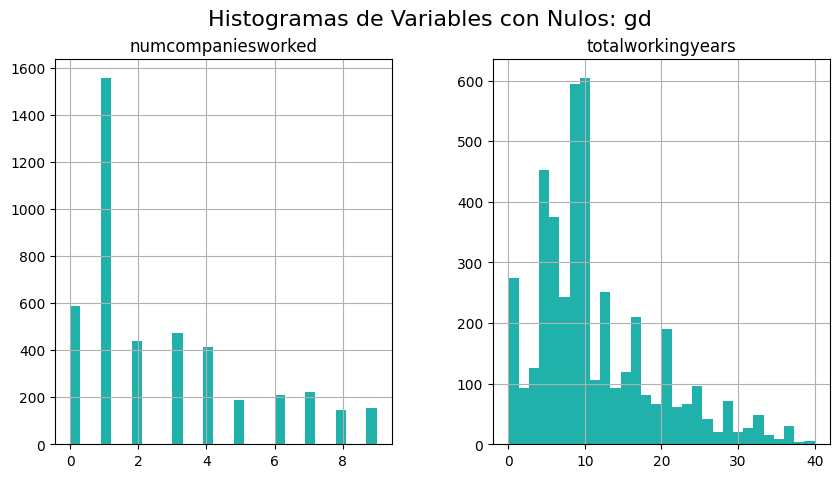

In [ ]:
#Se crean histogramas a las 2 variables con nulos para saber cuál
#técnica de imputación sería mas adecuada
gd_graf = gd[['numcompaniesworked', 'totalworkingyears']]
gd_graf.hist(bins=30, figsize=(10, 5), color='LightSeaGreen')

# Agregar títulos y etiquetas de ejes si es necesario
plt.suptitle("Histogramas de Variables con Nulos: gd", fontsize=16)
plt.show()

Al ser una cantidad poca de valores nulos, la gráfica no se ve gravemente afectada y la interpretación puede hacerse de manera objetiva. Vemos que la cantidad más representativa con más de 1400 personas han trabajado en una solo compañía, mientras que menos de 200 personas han trabajo entre 8 y 9 años respectivamente. Esta grafica tiene datos entre 0 y 9 empresas.

La grafica de la derecha, que representa el total de años que han trabajado, tiene un intervalo entre 0 y 40 años. La cantidad más representativa está entre las personas que han trabajado durante 0 y 10 años.


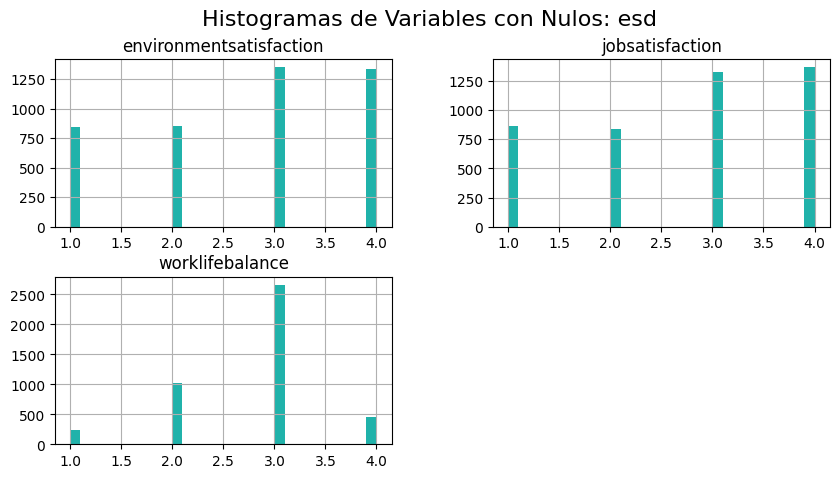

In [ ]:
#Se crean histogramas a las 3 variables con nulos para saber cuál
#técnica de imputación sería mas adecuada
esd_graf = esd[['environmentsatisfaction', 'jobsatisfaction', 'worklifebalance']]
esd_graf.hist(bins=30, figsize=(10, 5), color='LightSeaGreen')

# Agregar títulos y etiquetas de ejes si es necesario
plt.suptitle("Histogramas de Variables con Nulos: esd", fontsize=16)
plt.show()

La cantidad de nulos no es representativo por lo que las variables y la interpretación de la gráficas sigue siendo similar.

La gráfica que representa el Nivel de satisfacción de ambiente laboral tiene un intervalo entre 1 y 4, siendo 1 bajo y 4 muy alto. Vemos que la mayoría de los empleados estan satisfechos con el ambiente lateral y lo califican con alto o muy alto. Aunque mas de 1500 personas lo califican entre 1 y 2. Por otro lado la gráfica que representa el nivel de satisfacción laboral tiene un comportamiento muy similar.

Mientras que la gráfica que representa el Nivel de conciliación de la vida laboral y familiar se califica en general alto.

En este caso, se decide que la estrategia para imputar los datos nulos, será llenarlos con la mediana teniendo en cuenta que esta estrategia es la mas adecuada en estos casos. Se aplica la imputación de datos

In [ ]:
#Se realiza la imputación de los datos nulos por medio de la mediana
#ya que ambas variables corresponden a conteos exactos y llenar con la media
#podría traer datos atípicos
gd_copy = gd.copy() #Se realiza una copia para no tener el riesgo de dañar el DF original y tener que cargarlo nuevamente
gd_copy = impute_columns(df = gd_copy, columns = ['numcompaniesworked', 'totalworkingyears'], strategy = 'median')
gd_copy.isnull().sum() #Nuevamente se hace identificación de datos nulos y se observa que ya no hay ninguno

age                        0
attrition                  0
businesstravel             0
department                 0
distancefromhome           0
education                  0
educationfield             0
employeecount              0
employeeid                 0
gender                     0
joblevel                   0
jobrole                    0
maritalstatus              0
monthlyincome              0
numcompaniesworked         0
over18                     0
percentsalaryhike          0
standardhours              0
stockoptionlevel           0
totalworkingyears          0
trainingtimeslastyear      0
yearsatcompany             0
yearssincelastpromotion    0
yearswithcurrmanager       0
dtype: int64

In [ ]:
#Debido a que todas las variables con nulos son puntuaciones enteras de una encuesta,
#se optó por rellenar los datos nulos con la mediana
esd_copy = esd.copy()
esd_copy =impute_columns(esd, ['environmentsatisfaction', 'jobsatisfaction', 'worklifebalance'], 'median')
esd_copy.isnull().sum()

employeeid                 0
environmentsatisfaction    0
jobsatisfaction            0
worklifebalance            0
dtype: int64

####**Union de bases de datos**


*Unimos las bases a traves de la función merge usando la columna en común de todas la bases ("employeeid"). para esta unión se creará una variable llamada "id" que representa los datos de la variable anteriormente citada, para la unión de las bases se decidio usar inner en las primeras 2 dejando lo que hay en común en ambas tablas, para la unión con la utlima se ha decidido usar left para conservar todos los registros *

In [ ]:
#Se procede a unir los DF depurados en un solo gran DF llamado gdg
id = 'employeeid'
gdg = pd.merge(gd_copy, esd_copy, on=[id, id], how = 'inner')
gdg = pd.merge(gdg, msd, on=[id, id], how = 'inner')
gdg = pd.merge(gdg, tw, on=[id, id], how = 'left')
gdg.isnull().sum()

age                        0
attrition                  0
businesstravel             0
department                 0
distancefromhome           0
education                  0
educationfield             0
employeecount              0
employeeid                 0
gender                     0
joblevel                   0
jobrole                    0
maritalstatus              0
monthlyincome              0
numcompaniesworked         0
over18                     0
percentsalaryhike          0
standardhours              0
stockoptionlevel           0
totalworkingyears          0
trainingtimeslastyear      0
yearsatcompany             0
yearssincelastpromotion    0
yearswithcurrmanager       0
environmentsatisfaction    0
jobsatisfaction            0
worklifebalance            0
jobinvolvement             0
performancerating          0
mean_time                  0
dtype: int64

Se visualiza la nueva base de datos

In [ ]:
gdg.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,over18,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,6.8702
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,7.3160
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,6.8161
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,6.7892
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,7.8776



**Se grafican todas las variables categóricas para ver cómo se comportan sus valores**

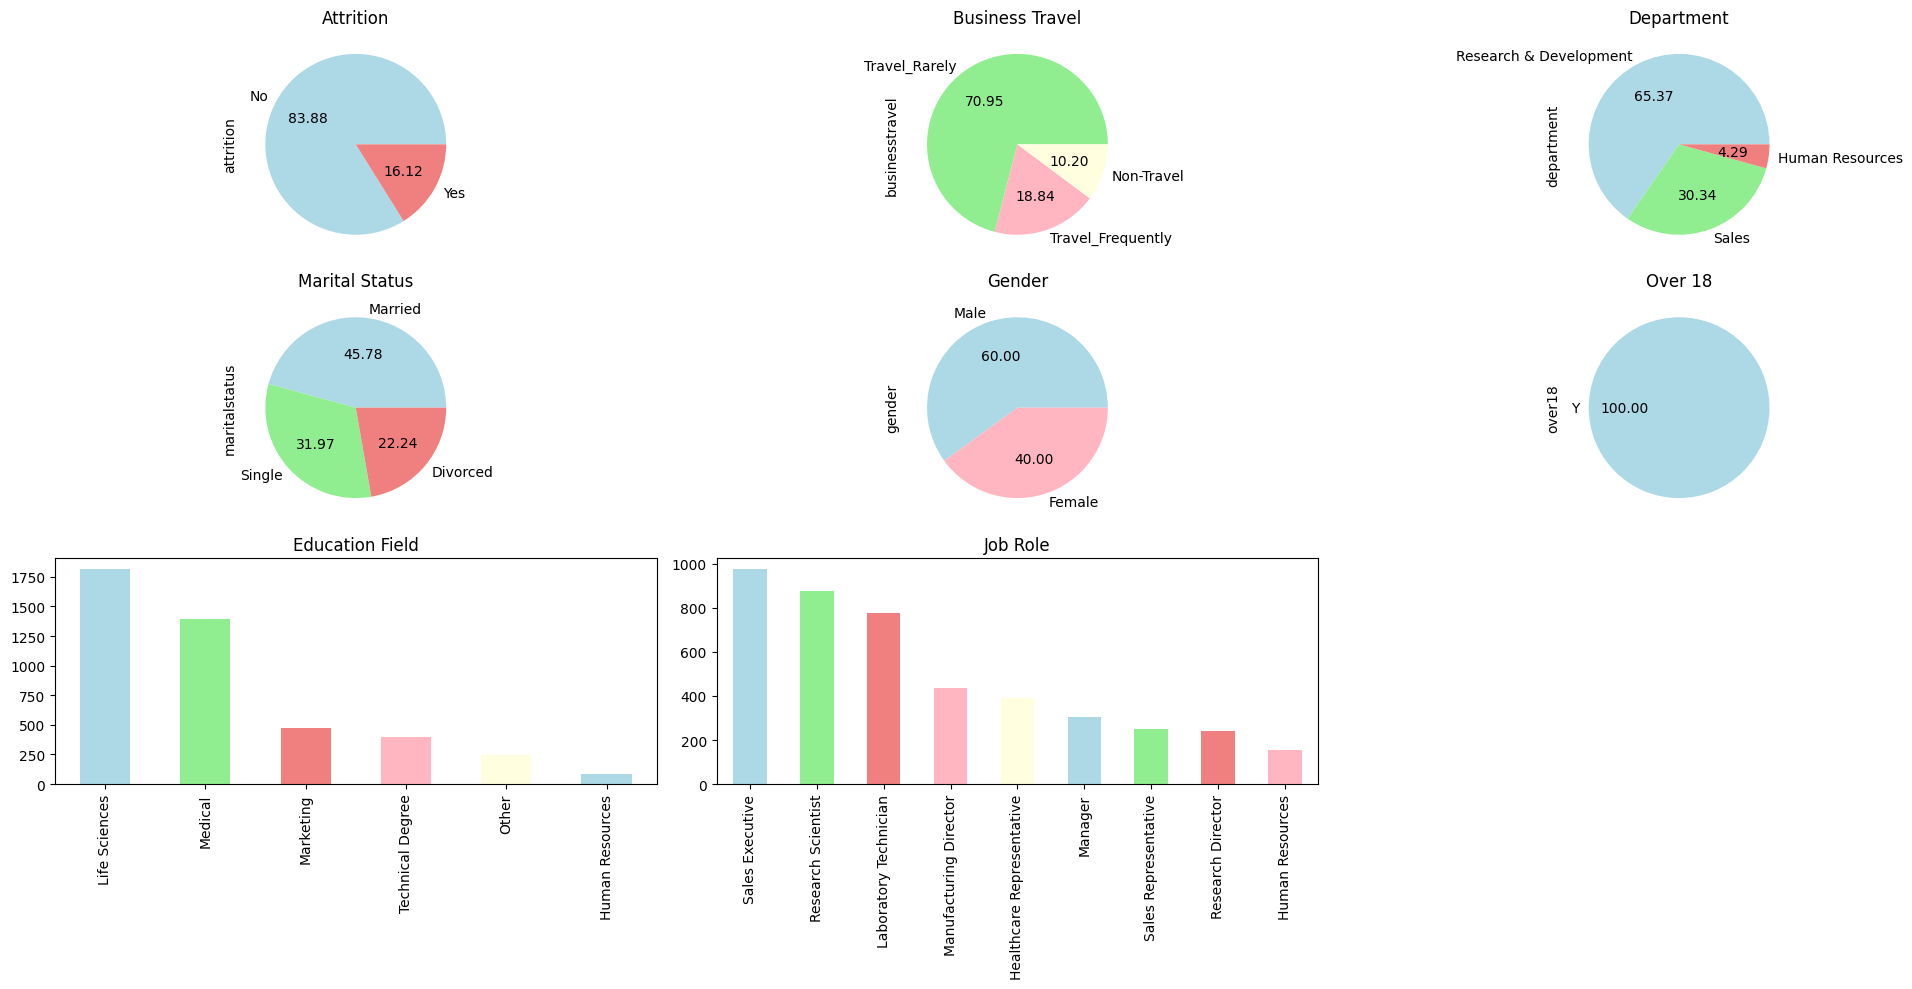

In [ ]:
plt.figure(figsize=(20, 10))

# Gráfico de pastel para 'attrition'
plt.subplot(331)
gdg['attrition'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightcoral'])
plt.title('Attrition')

# Gráfico de pastel para 'businesstravel'
plt.subplot(332)
gdg['businesstravel'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightgreen', 'lightpink', 'lightyellow'])
plt.title('Business Travel')

# Gráfico de pastel para 'department'
plt.subplot(333)
gdg['department'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Department')

# Gráfico de barras para 'educationfield'
plt.subplot(337)
gdg['educationfield'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow'])
plt.title('Education Field')

# Gráfico de pastel para 'gender'
plt.subplot(335)
gdg['gender'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'])
plt.title('Gender')

# Gráfico de barras para 'jobrole'
plt.subplot(338)
gdg['jobrole'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow'])
plt.title('Job Role')

# Gráfico de pastel para 'maritalstatus'
plt.subplot(334)
gdg['maritalstatus'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Marital Status')

# Gráfico de pastel para 'over18'
plt.subplot(336)
gdg['over18'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'])
plt.title('Over 18')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

**Se encuentra que la variable over 18 presenta el mismo valor en todas sus filas ya que significa que todos los trabajadores son mayores de 18 años por lo que se decide eliminarla debido a su irrelevancia dentro del caso de estudio**

**Luego se procede a graficar las variables numéricas para observar el rango en el que se mueven sus valores**

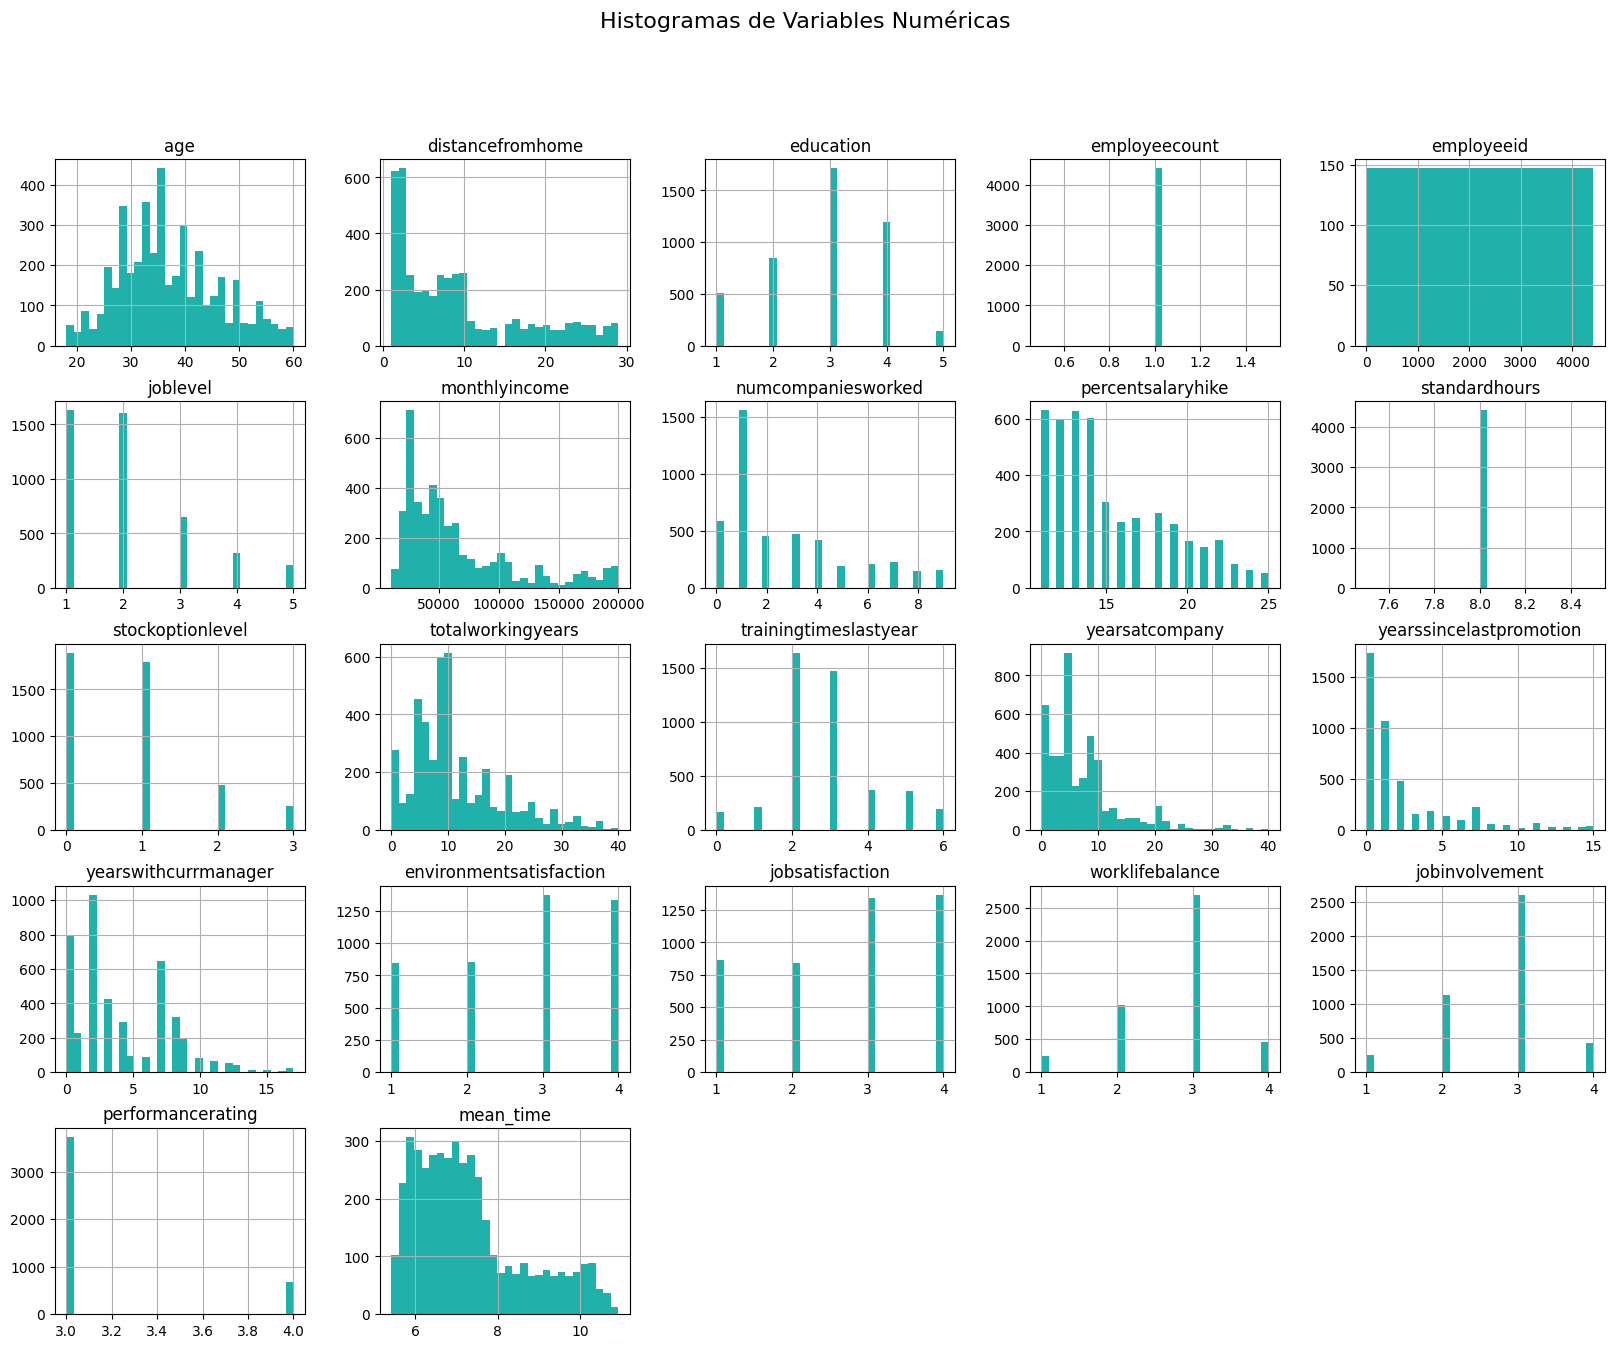

In [ ]:
gdg.hist(bins=30, figsize=(20, 15), color='LightSeaGreen')

# Agregar títulos y etiquetas de ejes si es necesario
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)
plt.show()

**Luego de graficar se puede observar que las variables employeecount y standarhours toman un solo valor en todas sus filas por lo que se decide eliminarlas.
La variable employeeid también se elimina debido a que es un número que identifica a cada empleado y no aporta nada al caso de estudio**

In [ ]:
#A partir de ahora se trabaja con una copia del DF para evitar errores en el original
##Se procede a eliminar las variables que no aportan nada al caso de estudio
gdg_copy = gdg.copy()
gdg_copy = gdg_copy.drop(['over18', 'employeecount', 'employeeid', 'standardhours'], axis=1)
gdg_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4410 non-null   int64  
 1   attrition                4410 non-null   object 
 2   businesstravel           4410 non-null   object 
 3   department               4410 non-null   object 
 4   distancefromhome         4410 non-null   int64  
 5   education                4410 non-null   int64  
 6   educationfield           4410 non-null   object 
 7   gender                   4410 non-null   object 
 8   joblevel                 4410 non-null   int64  
 9   jobrole                  4410 non-null   object 
 10  maritalstatus            4410 non-null   object 
 11  monthlyincome            4410 non-null   int64  
 12  numcompaniesworked       4410 non-null   float64
 13  percentsalaryhike        4410 non-null   int64  
 14  stockoptionlevel        

**Se procede a graficar la variable objetivo para saber la distribución exacta de sus datos**

Text(0.5, 1.0, 'Gráfico de Torta - Attrition')

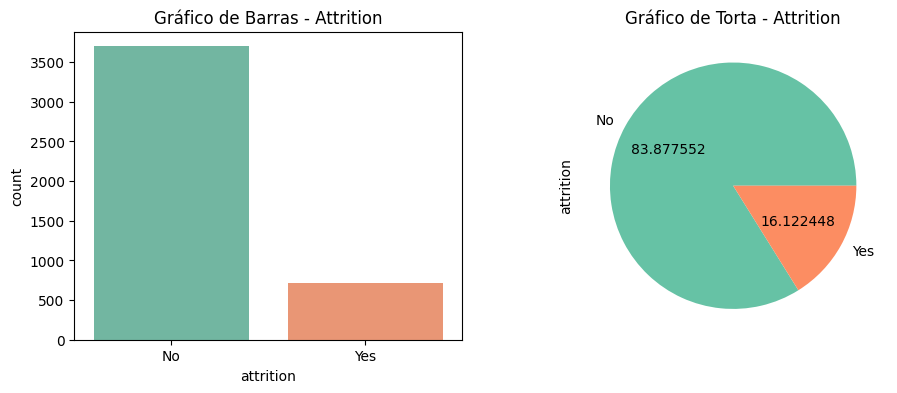

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

# Gráfico de Barras con paleta "Set2"
sns.countplot(ax=axes[0], x="attrition", data=gdg_copy, palette='Set2')
axes[0].set_title("Gráfico de Barras - Attrition")

# Gráfico de Torta con paleta "Set2"
gdg_copy["attrition"].value_counts().plot.pie(autopct='%2f', ax=axes[1], wedgeprops={'linewidth': 8}, colors=sns.color_palette('Set2'))
axes[1].set_title("Gráfico de Torta - Attrition")

**Vemos que se presenta el no en una mayor proporción con apróximadamente un 84%, mientras que las personas que si renunciaron el último año tienen un porcentaje de 16%. Esto es muy importante en el momento de crear el modelo.**

# Preparación de datos y selección de variables

Seleccionamos la variable objetivo, la cual es la variable ¨atrittion¨.

In [ ]:
#cambiamos el nombre de la variable objetivo a target
gdg_copy = gdg_copy.rename(columns = {'attrition' : 'target'})
 #renombramos la variable objetivo
y = gdg_copy.target
# LabelEncoder: Transformarmos la variable objetivo en numérica.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0:5])

print(le.classes_)

[0 1 0 0 0]
['No' 'Yes']


**Si la variable cae en 0 pertenece a que "NO" renuncia al trabajo y 1 a "SI" renuncia**

**Después de asignar la variable objetivo, empezamos con la transformación, análisis y almacenamiento de las variables predictoras, las cuales estarán seleccionadas según el tipo de dato, ya sean Entera, Decimal u Objeto.**

Se empieza a clasificar y almacenar todas las variables tipo ENTERA

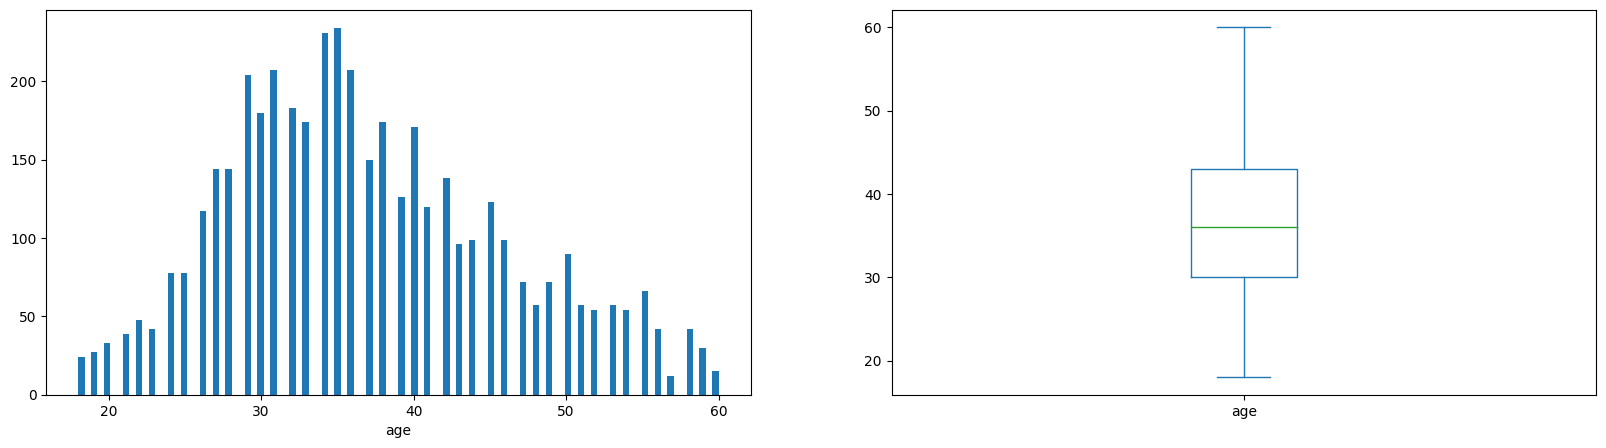

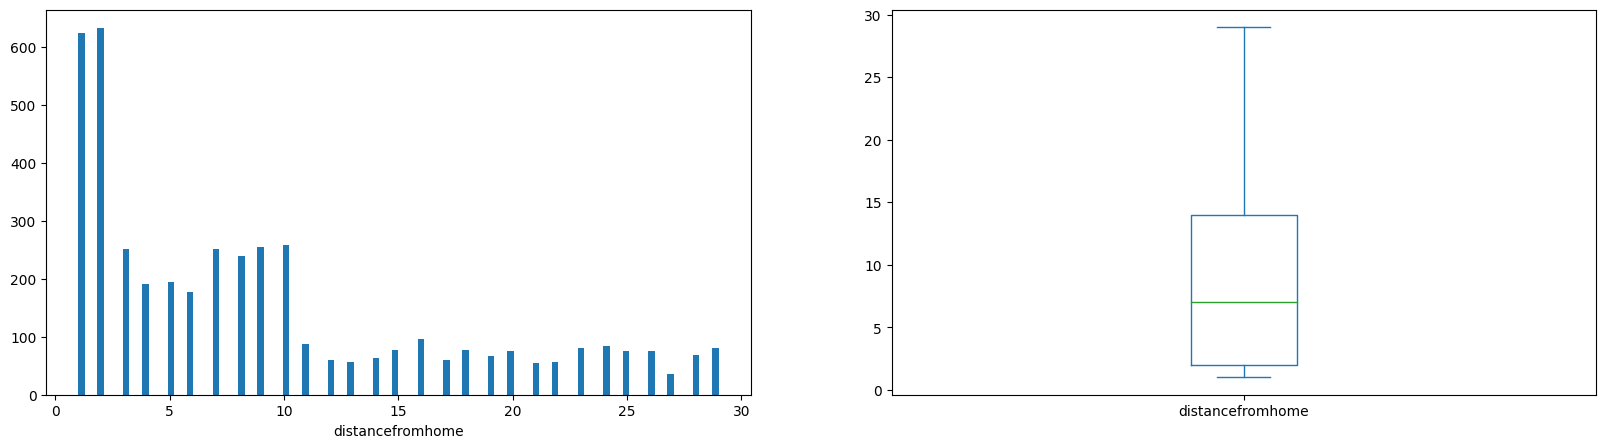

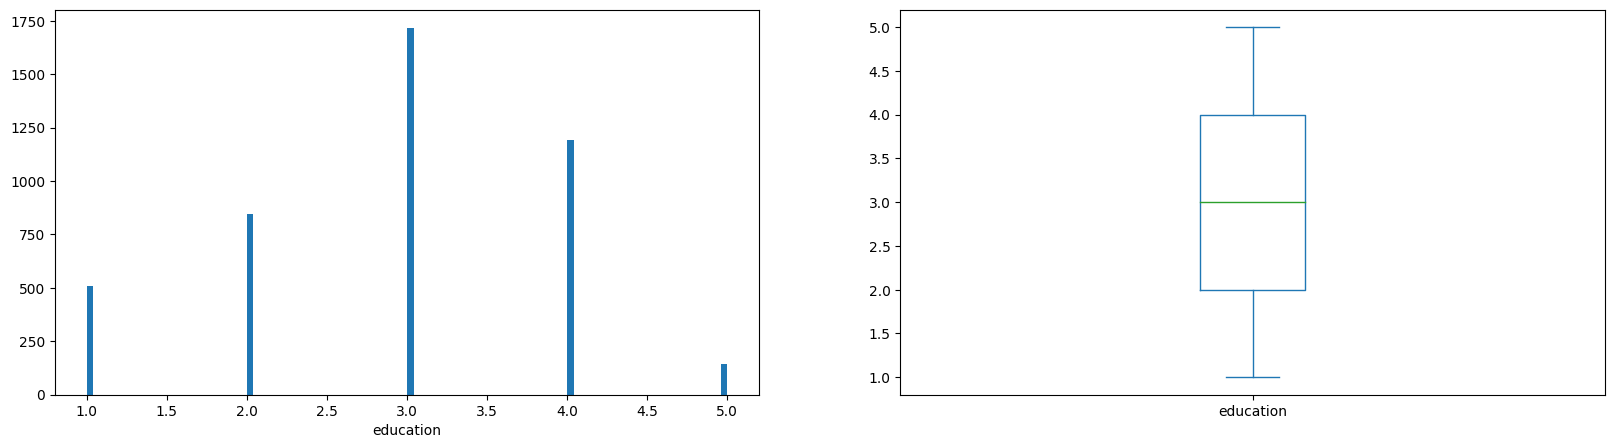

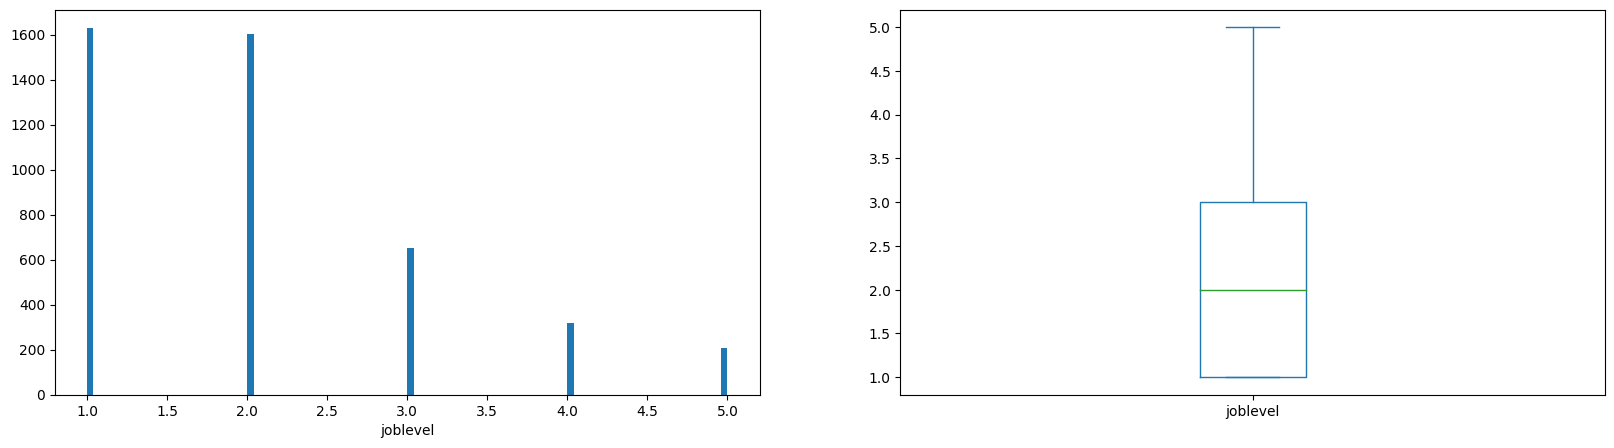

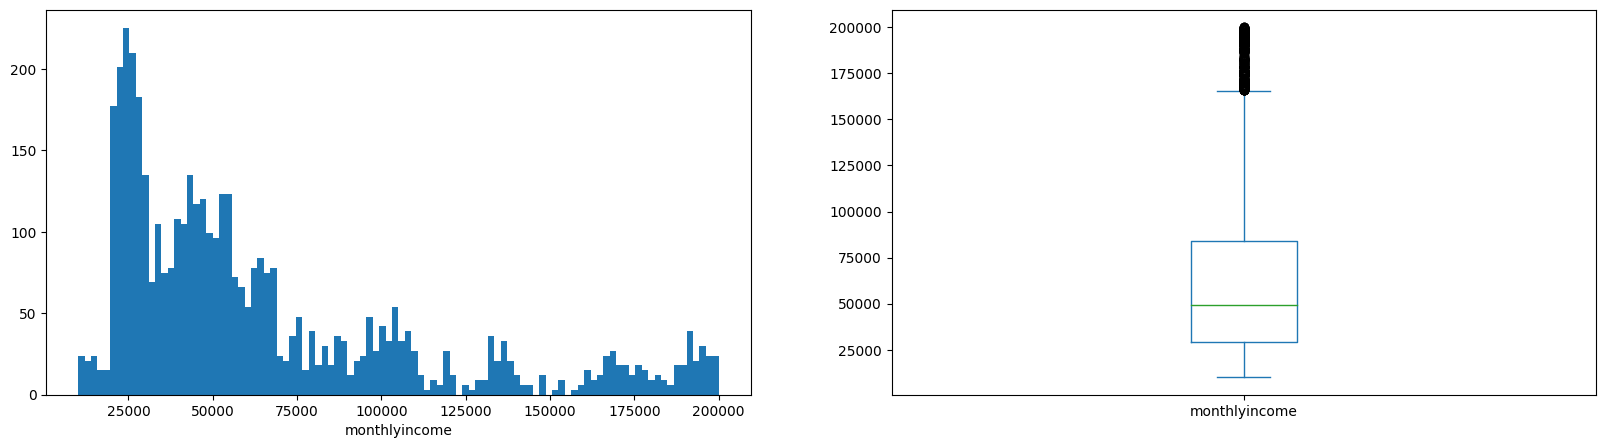

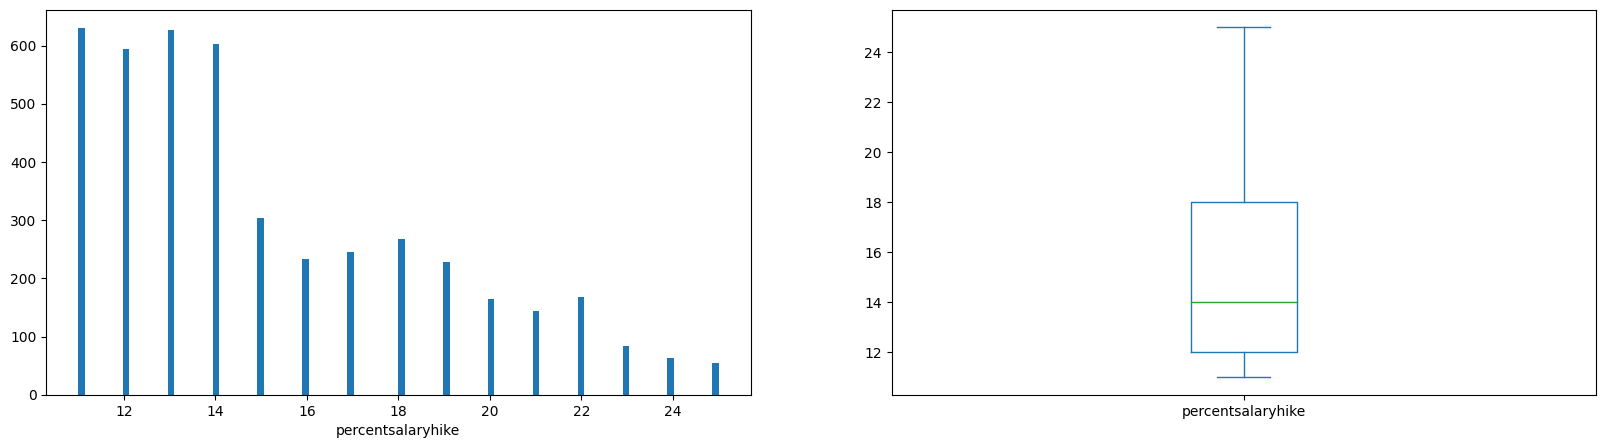

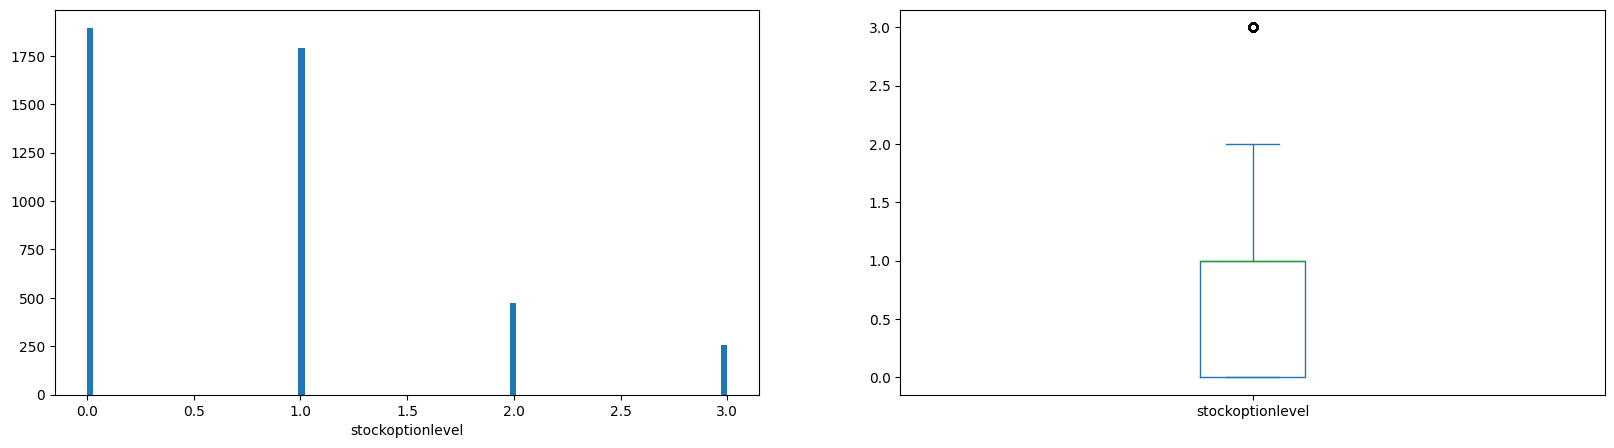

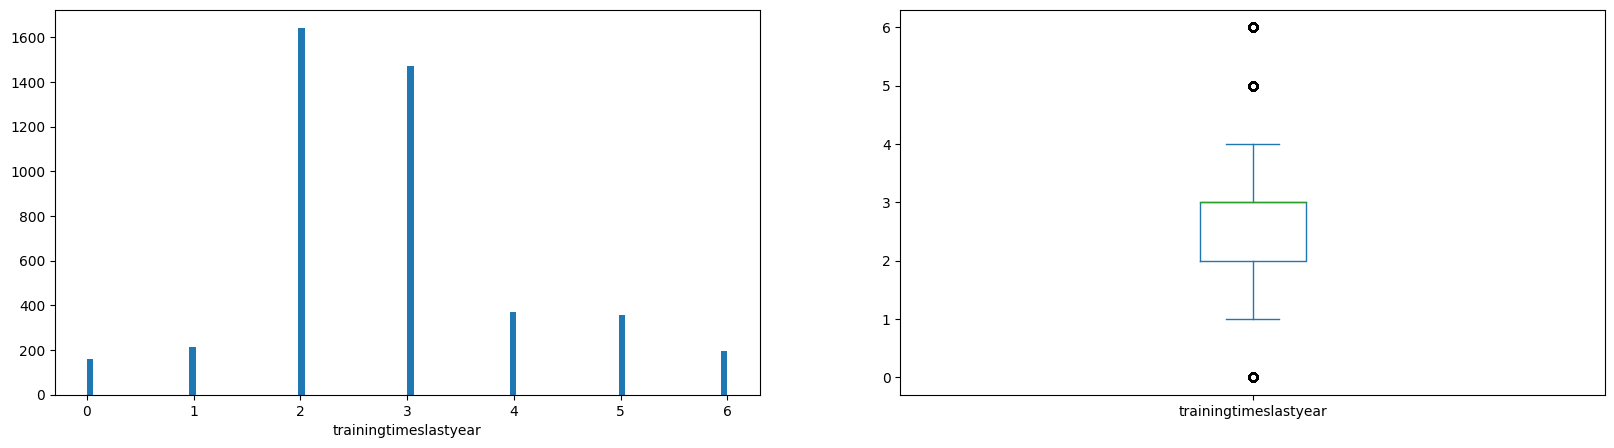

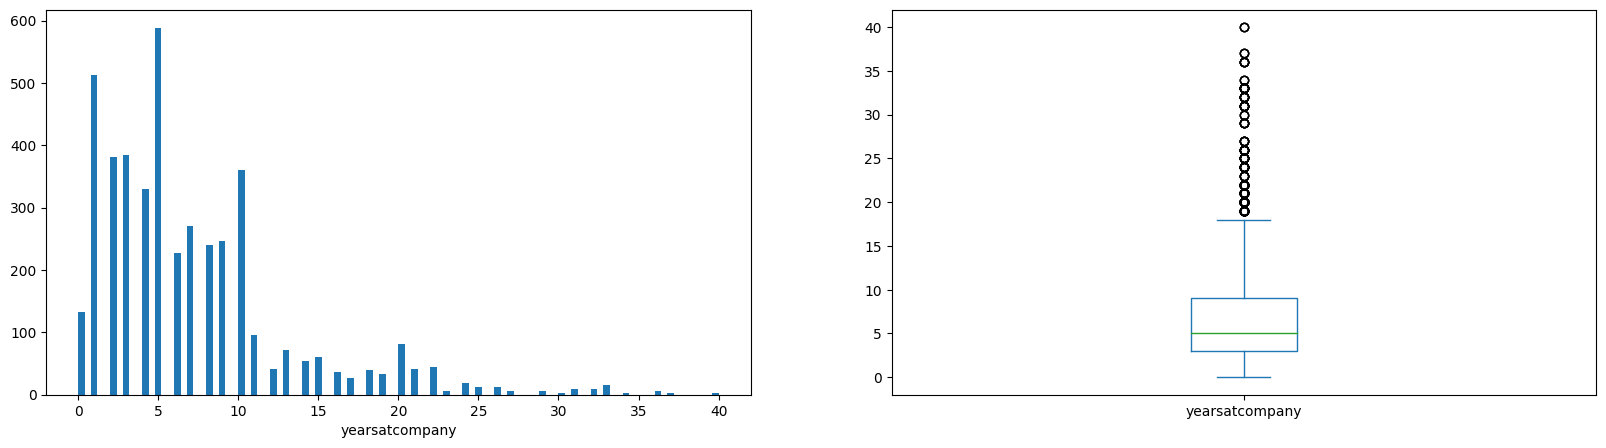

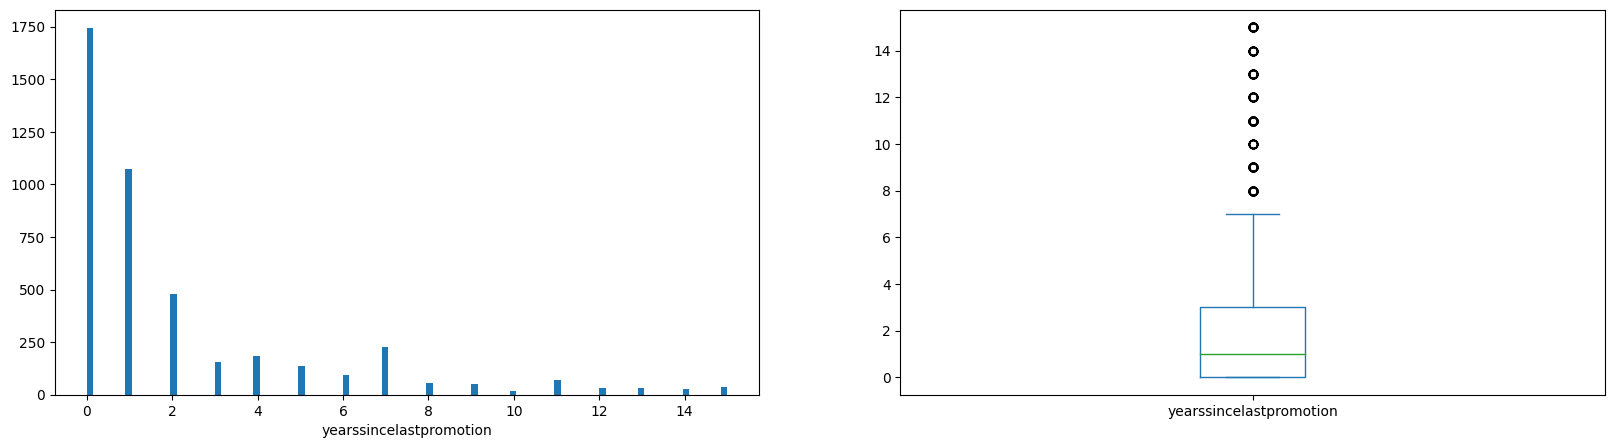

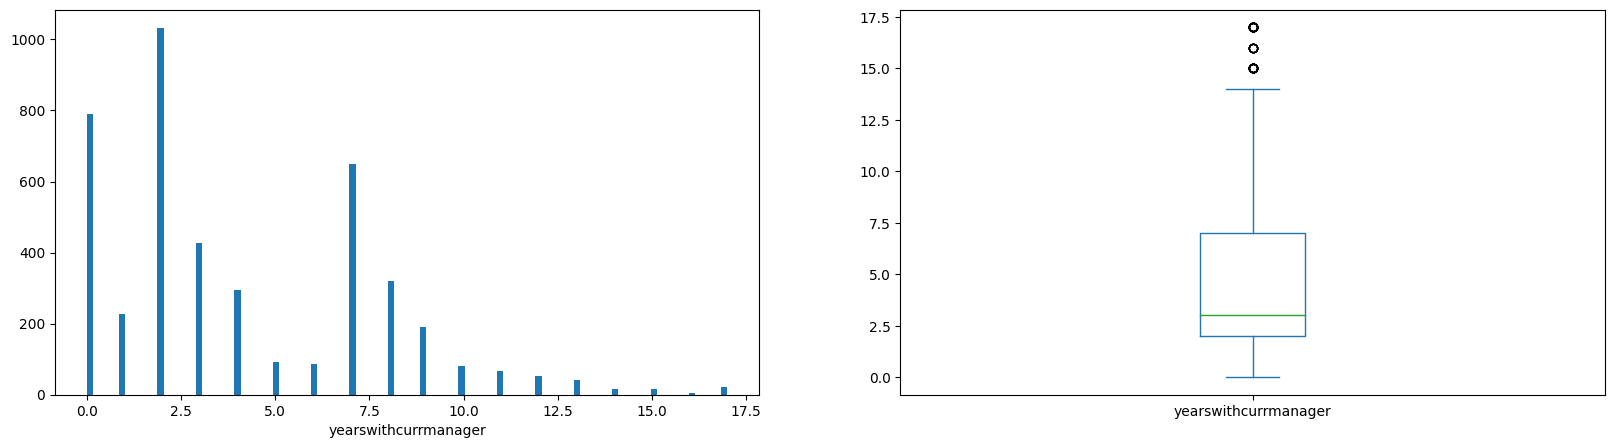

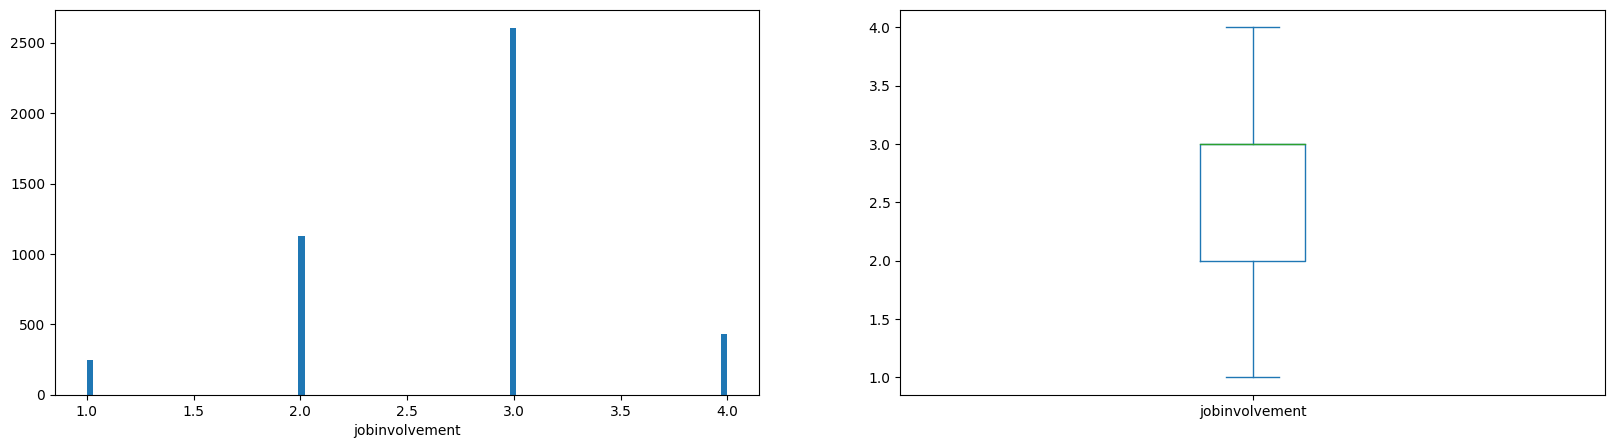

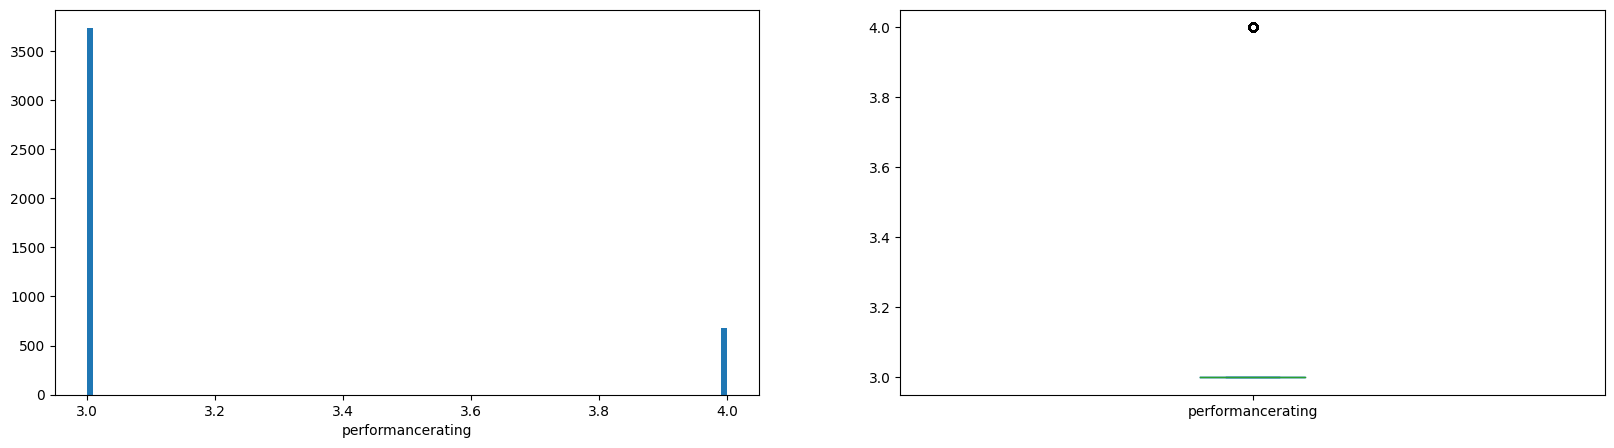

In [ ]:
#COLUMNAS NUMERICAS ENTERAS
X_int=gdg_copy.select_dtypes(include=['int64'])
# X_int


for variable in X_int:
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_int[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_int[variable].plot(kind='box')
  # plt.title('Boxplot - target (mpg)')

1. Para la grafica de edad se puede observar como sus datos tienen un comportamiento normal, dado a que el rango de edades tiene un punto central con una pequeña tendencia a la izquierda lo que nos dice que hya mas jovenes que mayores, tambien mirando el comportamiento del boxplox vemos como no hay valores atipicos y con mediana constante.

2. en esta grafica vemos la distribuciòn de la distancia de las personas a sus hogares, observamos que los valores mas comunes son entre 1km y 2km lo que indican que viven cerca, esto lo podemos  re afirmar gracias al box plox el cual su mediana tiende mas al borde inferior lo que significa que la mayoria de personas viven cerca

 en conclusión analizando con estas graficas pudimos observar facilmente las cuales son aquellas variables categoricas y así poder separarlas para ser convertidas y no nos saquen errores en el modelo, las variables fueron: education, joblevel, stockoptionlevel,performancerating, jobinvolvement

In [ ]:
##De los histogramas se observa que las siguientes variables se comportan como variables categoricas, por tanto se deben codificar y posteriormente agregar a la base de categoricas.
t=pd.concat([X_int["stockoptionlevel"],X_int["performancerating"],X_int["jobinvolvement"],X_int["joblevel"],X_int["education"]],axis=1)
t=t.astype(str)
t=pd.get_dummies(t)
X_object_t=pd.concat([X_int, t], axis=1)
#veamos las categorias de estas variables
print("Categorias de StockOptionLevel: ", X_int["stockoptionlevel"].unique())
print("Categorias de PerformanceRating: ", X_int["performancerating"].unique())
print("Categorias de JobInvolvement: ", X_int["jobinvolvement"].unique())
print("Categorias de JobLevel: ", X_int["joblevel"].unique())
print("Categorias de Education: ", X_int["education"].unique())
print("Categorias de TrainingTimesLastYear: ", X_int["trainingtimeslastyear"].unique())


#Se eliminan las variables que se pasaron a categoricas
X_int.drop(["stockoptionlevel","performancerating","jobinvolvement","joblevel","education"], axis = 1, inplace = True)
##las demas variables se llevan a tipo float para asegurar la escala de los datos
X_int=X_int.astype(int)
X_int.head()

Categorias de StockOptionLevel:  [0 1 3 2]
Categorias de PerformanceRating:  [3 4]
Categorias de JobInvolvement:  [3 2 1 4]
Categorias de JobLevel:  [1 4 3 2 5]
Categorias de Education:  [2 1 4 5 3]
Categorias de TrainingTimesLastYear:  [6 3 2 5 4 0 1]


,age,distancefromhome,monthlyincome,percentsalaryhike,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager
0,51,6,131160,11,6,1,0,0
1,31,10,41890,23,3,5,1,4
2,32,17,193280,15,2,5,0,3
3,38,2,83210,11,5,8,7,5
4,32,10,23420,12,2,6,0,4


Se clasifican y almacenan todas las variables tipo OBJETO

In [ ]:
#COLUMNAS OBJECT
X_object=gdg_copy.select_dtypes(include=['object'])

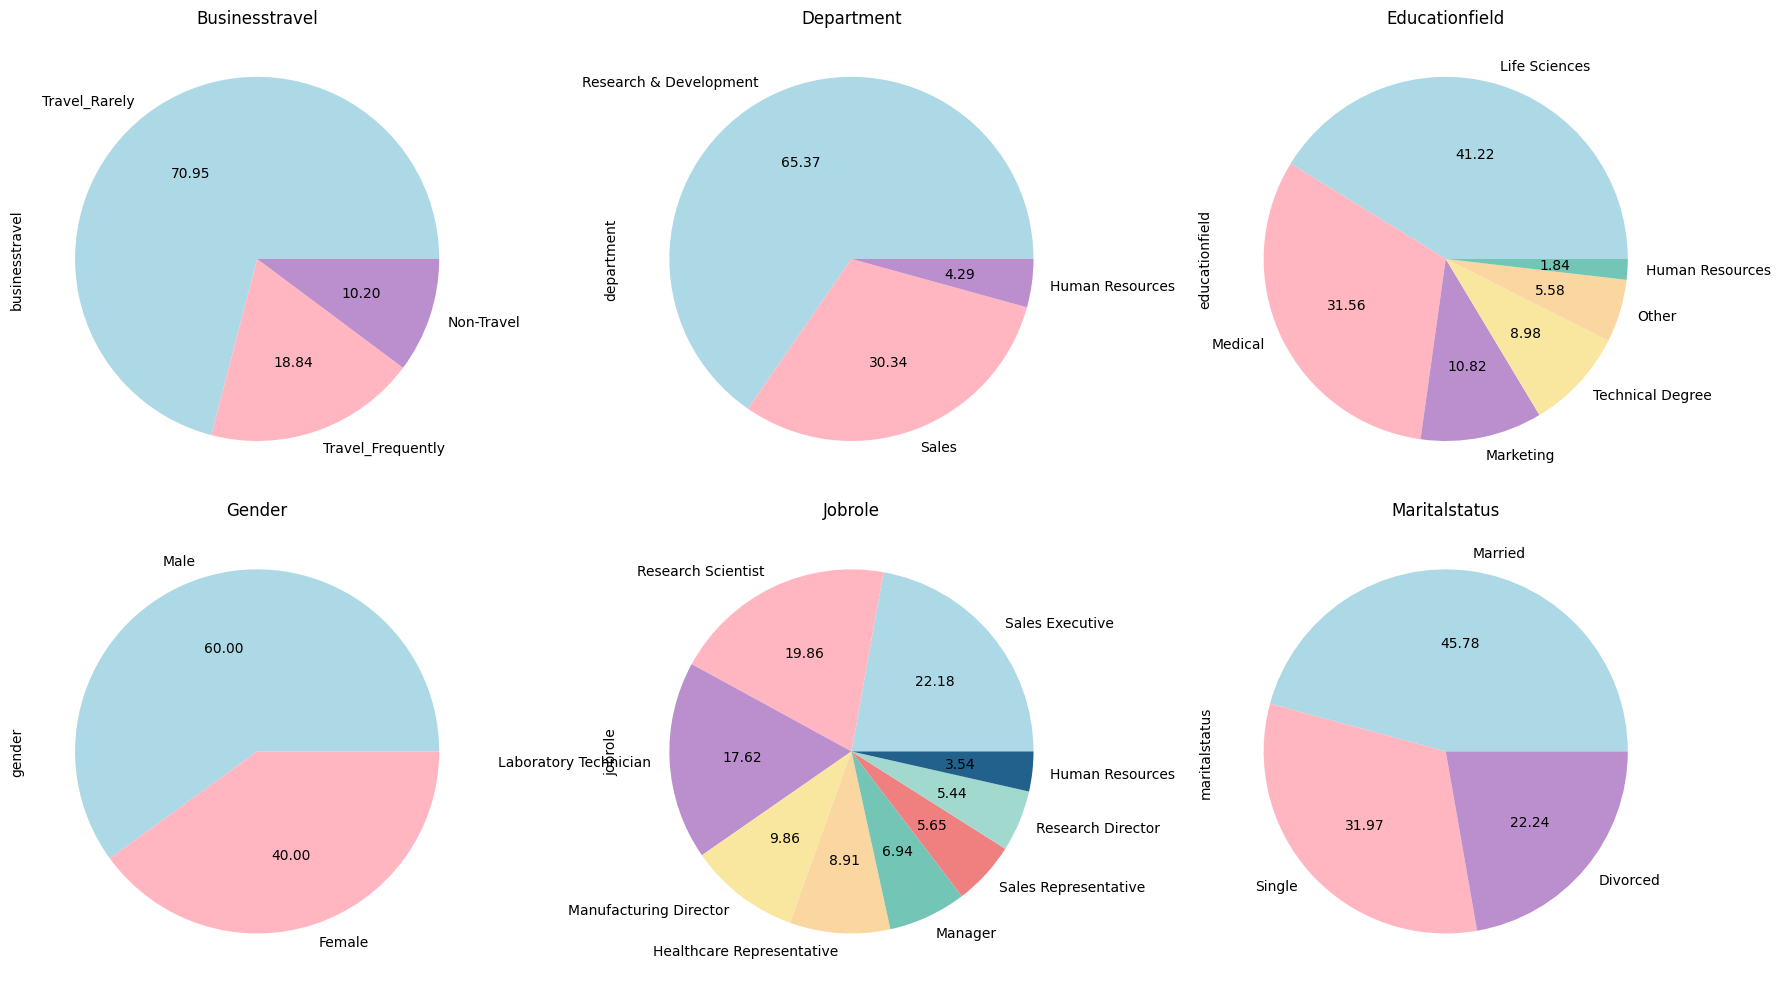

In [ ]:
# Crear una figura con subplots organizados en 2 filas y 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Gráfico de pastel para 'businesstravel'
gdg['businesstravel'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 0])
axes[0, 0].set_title('Businesstravel')

# Gráfico de pastel para 'department'
gdg['department'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 1])
axes[0, 1].set_title('Department')

# Gráfico de pastel para 'educationfield'
gdg['educationfield'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[0, 2])
axes[0, 2].set_title('Educationfield')

# Gráfico de pastel para 'gender'
gdg['gender'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'], ax=axes[1, 0])
axes[1, 0].set_title('Gender')

# Gráfico de pastel para 'jobrole'
gdg['jobrole'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6','#F08080','#A2D9CE','#21618C'], ax=axes[1, 1])
axes[1, 1].set_title('Jobrole')

# Gráfico de pastel para 'maritalstatus'
gdg['maritalstatus'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[1, 2])
axes[1, 2].set_title('Maritalstatus')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Para las graficas categoricas tenemos las siguientes variables:

Frecuencia con la que los empleados viajaron por motivos de trabajo en el último año, donde vemos que la frecuencia más representativa es que los emopleados raramente viajaron el último año con un porcentaje del 71% aproximadamente, las personas que viajaron frecuentemente son el 19% de las empleados, mientras que las personas que no viajaron corresponden al 10%
Departamento en la empresa, el porcentaje de los empleados más representativo corresponde al departamento de investigación y desarrollo con aproximadamente un 65%, seguido del departamento de ventas con un 30% y por ultimo el departamento de recursos humanos con un 5%
Ámbito de formación, esta variable se clasifica en 6 ámbitos, los cuales son: Médico, Marketing, Recursos humanos, Ciencias de la vida, Título técnico y otro. Con un 41% de los empleados, el ambito de formación más representativo es Ciencias de la vida, mientras que el menos representativo es recursos humanos.
Género, el 60% de los empleados son de género masculino, mientras que el 40% restante es femenino
Nombre del puesto de trabajo en la empresa, esta variable se clasifica en 9 puestos de trabajo: Ejecutivo en ventas, Recursos Humanos, Director de desarrollo, Representante de ventas, gerente, Representante de la salud, Director de manufactura, Técnico de laboratorio e Investigador Científico. Dónde los puestos de trabajo más ocupados son Ejecutivo en ventas e Investigador científico con apróximadamente un 22% y 20% respectivamente. Mientras que el puesto menos ocupado es Recursos humanos con un 4% apróximadamente.
Estado civil del empleado, esta variable se clasifica en casado, soltero y divorciado. Donde en mayor porcentaje los empleados están casado con un 46% apróximadamente, seguida de los solteros con un 32% y por último los divorciados con un 22%

In [ ]:
ttt=pd.concat([X_object["maritalstatus"],X_object["gender"],X_object["department"],X_object["businesstravel"]],axis=1)#concatenar las variables categoricas que se encuentran en X_object
ttt=ttt.astype(str)# se cambia el tipo de datos a string
ttt=pd.get_dummies(ttt)# se convirten a dummies
X_object_t=pd.concat([X_object, ttt], axis=1)#concatenamos categoricas con objeto

#veamos las categorias de estas variables
print("Categorias de maritalstatus: ", X_object["maritalstatus"].unique())
print("Categorias de gender: ", X_object["gender"].unique())
print("Categorias de department: ", X_object["department"].unique())
print("Categorias de busisnesstravel: ", X_object["businesstravel"].unique())


Categorias de maritalstatus:  ['Married' 'Single' 'Divorced']
Categorias de gender:  ['Female' 'Male']
Categorias de department:  ['Sales' 'Research & Development' 'Human Resources']
Categorias de busisnesstravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [ ]:
X_object_t.drop(["maritalstatus","gender","department","businesstravel","target","educationfield","jobrole"], axis = 1, inplace = True)#eliminación de variables categoricas y las objeto

In [ ]:
X_object_t.head()#mirar la base de datos

,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,gender_Female,gender_Male,department_Human Resources,department_Research & Development,department_Sales,businesstravel_Non-Travel,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely
0,0,1,0,1,0,0,0,1,0,0,1
1,0,0,1,1,0,0,1,0,0,1,0
2,0,1,0,0,1,0,1,0,0,1,0
3,0,1,0,0,1,0,1,0,1,0,0
4,0,0,1,0,1,0,1,0,0,0,1


a continuación se clasifica almacena las variables tipo FLOAT

In [ ]:
X_float = gdg_copy.select_dtypes(include=['float64'])#se crea copia donde aparazcan las variables de tipo float
X_float

,numcompaniesworked,totalworkingyears,environmentsatisfaction,jobsatisfaction,worklifebalance,mean_time
0,1.0,1.0,3.0,4.0,2.0,6.8702
1,0.0,6.0,3.0,2.0,4.0,7.3160
2,1.0,5.0,2.0,2.0,1.0,6.8161
3,3.0,13.0,4.0,4.0,3.0,6.7892
4,4.0,9.0,4.0,1.0,3.0,7.8776
...,...,...,...,...,...,...
4405,3.0,10.0,4.0,1.0,3.0,8.3169
4406,2.0,10.0,4.0,4.0,3.0,5.8972
4407,0.0,5.0,1.0,3.0,3.0,7.1495
4408,0.0,10.0,4.0,1.0,3.0,9.1876


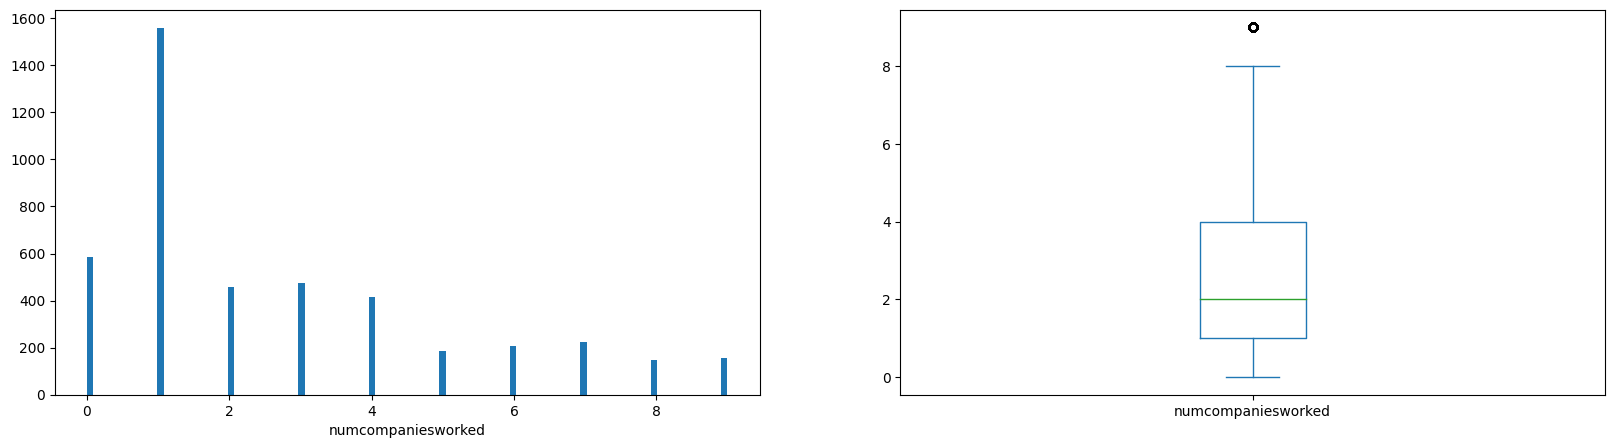

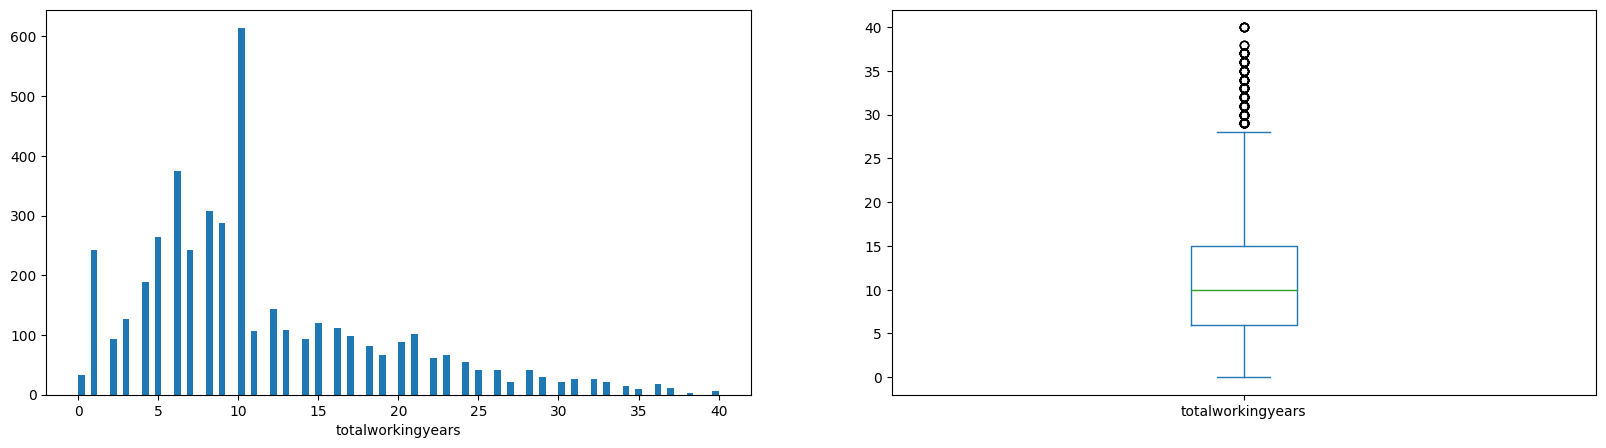

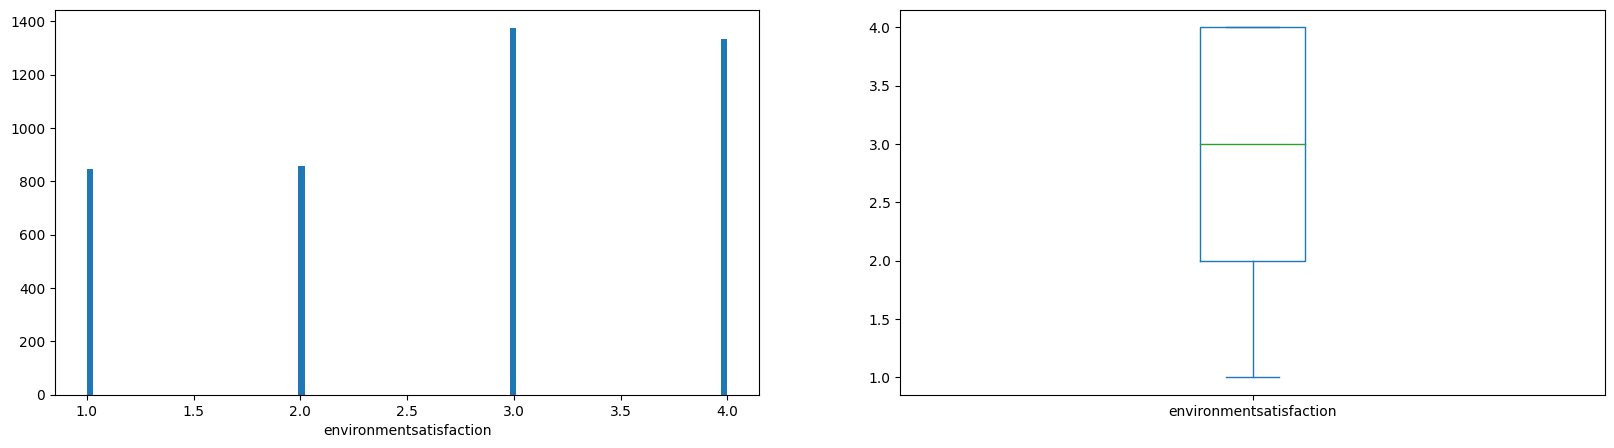

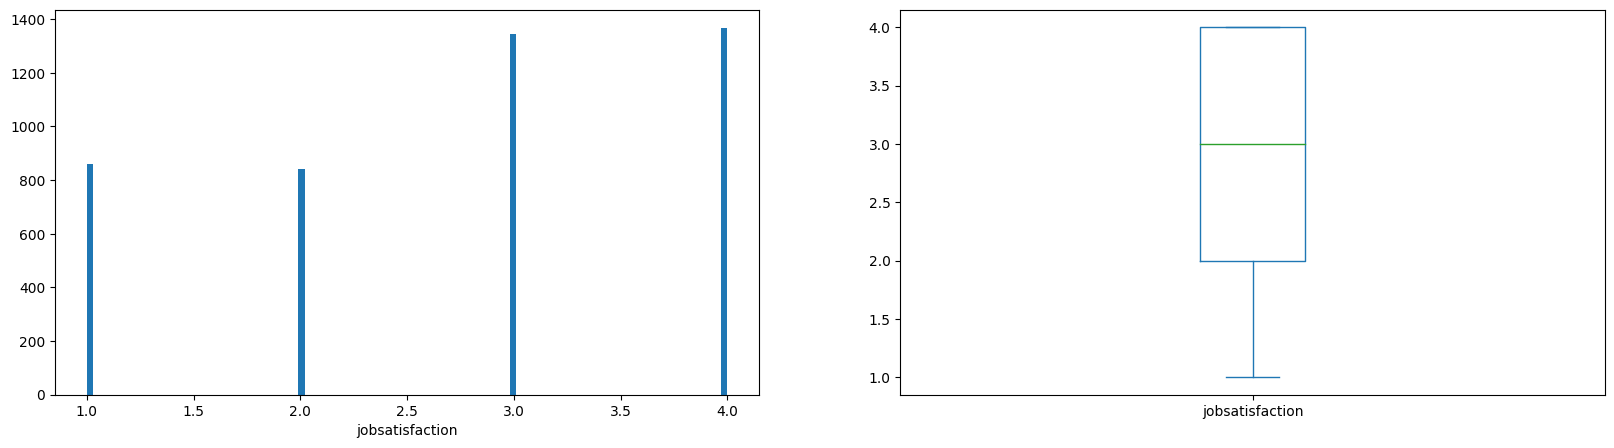

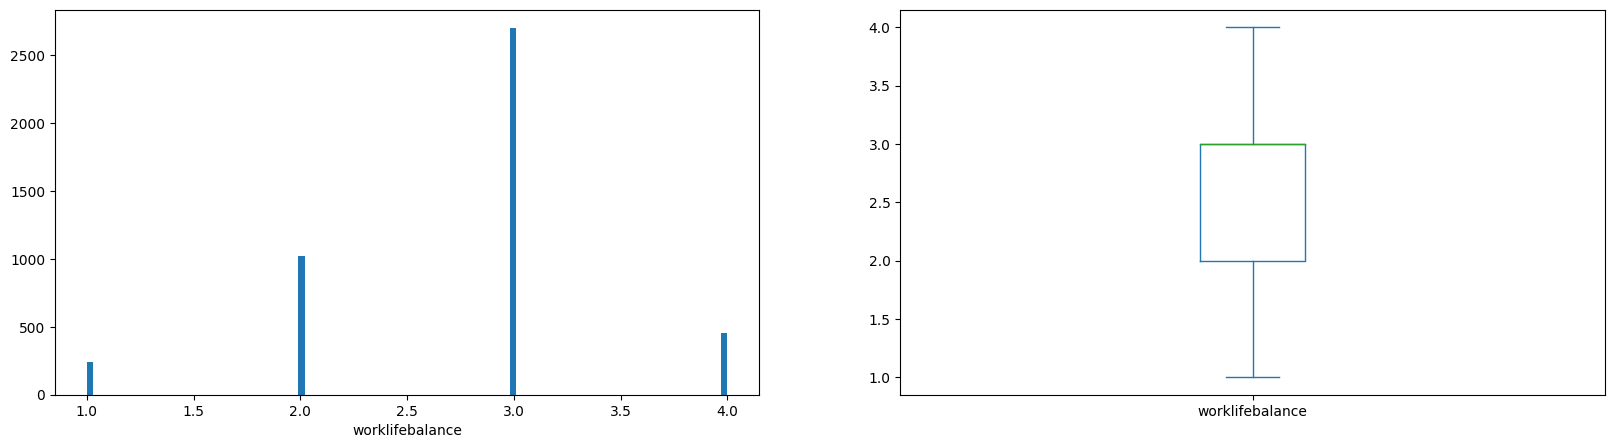

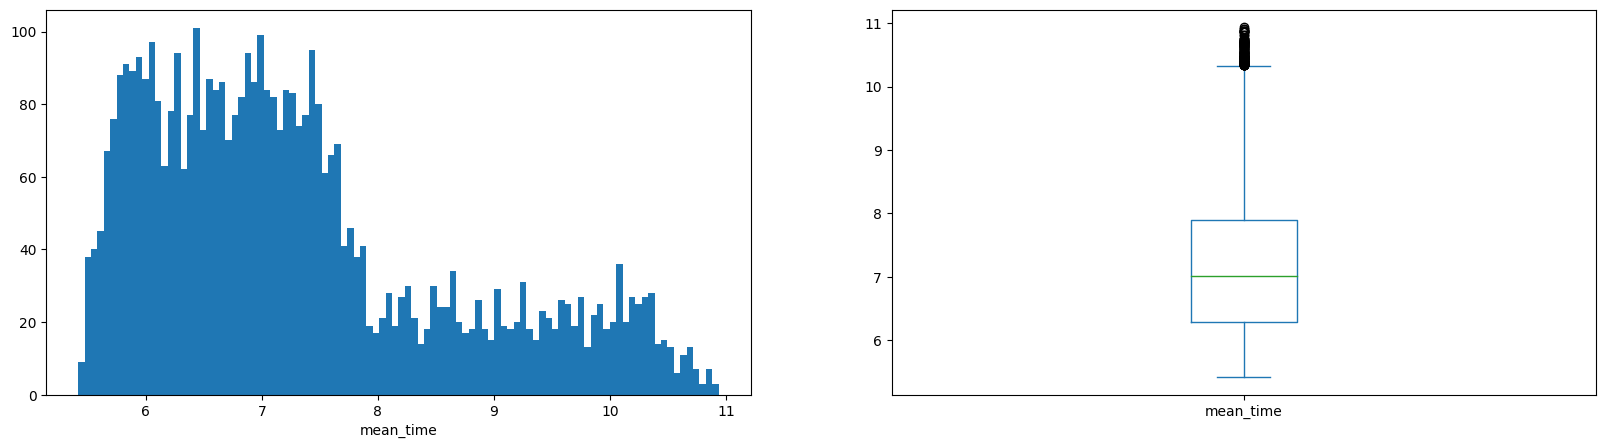

In [ ]:
for variable in X_float: # se crea graficos para las variables float
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_float[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_float[variable].plot(kind='box')

In [ ]:
##De los histogramas se observa que las siguientes variables se comportan como variables categoricas, por tanto se deben codificar
# y posteriormente agregar a la base de categoricas.
tt=pd.concat([X_float["environmentsatisfaction"],X_float["jobsatisfaction"],X_float["worklifebalance"]],axis=1)
tt=tt.astype(str)
tt=pd.get_dummies(tt)
X_object_t=pd.concat([X_object_t, tt], axis=1)

#Se eliminan las variables que se pasaron a categoricas
X_float.drop(["environmentsatisfaction","jobsatisfaction","worklifebalance"], axis = 1, inplace = True)
X_object_t=X_object_t.astype(int)
X_float.head()

,numcompaniesworked,totalworkingyears,mean_time
0,1.0,1.0,6.8702
1,0.0,6.0,7.3160
2,1.0,5.0,6.8161
3,3.0,13.0,6.7892
4,4.0,9.0,7.8776


A continuación, se realiza una matriz de correlación entre variables numéricas

In [ ]:
X_corr = pd.concat([X_int, X_float], axis=1)#contenamos las variables tipo int y tipo float
X_corr

,age,distancefromhome,monthlyincome,percentsalaryhike,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,numcompaniesworked,totalworkingyears,mean_time
0,51,6,131160,11,6,1,0,0,1.0,1.0,6.8702
1,31,10,41890,23,3,5,1,4,0.0,6.0,7.3160
2,32,17,193280,15,2,5,0,3,1.0,5.0,6.8161
3,38,2,83210,11,5,8,7,5,3.0,13.0,6.7892
4,32,10,23420,12,2,6,0,4,4.0,9.0,7.8776
...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,60290,17,5,3,0,2,3.0,10.0,8.3169
4406,29,2,26790,15,2,3,0,2,2.0,10.0,5.8972
4407,25,25,37020,20,4,4,1,2,0.0,5.0,7.1495
4408,42,18,23980,14,2,9,7,8,0.0,10.0,9.1876


Text(0.5, 1.0, 'Correlación entre variables')

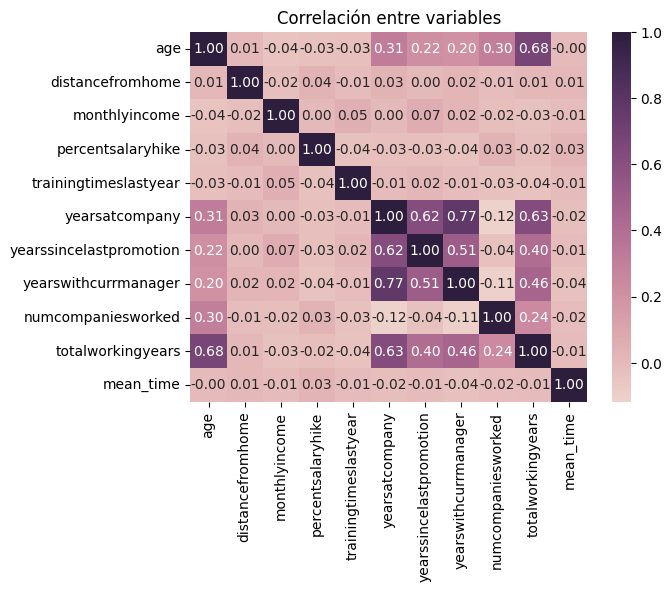

In [ ]:

sns.heatmap(X_corr.corr(), annot = True, cmap = sns.cubehelix_palette(as_cmap=True), fmt = ".2f") #matriz de correlaciòn de int y float
plt.title("Correlación entre variables")

Se puede observar que las variables:

Age

YearsAtCompany

YearsSinceLastPromotion

YearsWithCurrManager

TotalWorkingYears

Presentan una correlación positiva entre ellas, lo cual puede deberse a su naturaleza, ya que a mayor edad, mayor cantidad de años trabajando, lo que permite una mayor cantidad de años trabajando en la misma empresa y que haya sido promovido por su experiencia, además de haber estado una mayor cantidad de años trabajando bajo el mismo jefe.

A continuación se crea una nueva bases de datos general, la cual contiene todas las otras bases de datos que contienen las variables clasificadas según su tipo.

In [ ]:
##Se juntan todas las bases de datos con los float, int y object en una sola
X_total=pd.concat([X_int, X_float, X_object_t], axis=1)
X_total.head()

,age,distancefromhome,monthlyincome,percentsalaryhike,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,numcompaniesworked,totalworkingyears,mean_time,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,gender_Female,gender_Male,department_Human Resources,department_Research & Development,department_Sales,businesstravel_Non-Travel,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,environmentsatisfaction_1.0,environmentsatisfaction_2.0,environmentsatisfaction_3.0,environmentsatisfaction_4.0,jobsatisfaction_1.0,jobsatisfaction_2.0,jobsatisfaction_3.0,jobsatisfaction_4.0,worklifebalance_1.0,worklifebalance_2.0,worklifebalance_3.0,worklifebalance_4.0
0,51,6,131160,11,6,1,0,0,1.0,1.0,6.8702,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,31,10,41890,23,3,5,1,4,0.0,6.0,7.3160,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,32,17,193280,15,2,5,0,3,1.0,5.0,6.8161,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
3,38,2,83210,11,5,8,7,5,3.0,13.0,6.7892,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,32,10,23420,12,2,6,0,4,4.0,9.0,7.8776,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0


#Modelos

A continuación se realizarán modelos de regresión logística, además de técnicas de selección de parámetros. Tambien, se aplicará a este caso de estudio un modelo de Decision Tree Clasiffier, esto con el fin de comparar sus desempeños y decidir cual de estos es el metodo mas adecuado para aplicar en este ejercicio.

Se debe tener en cuenta que estos modelos se aplicarán a los datos de validación (test), ya que esto permite medir el desempeño de los modelos ante datos nuevos distintos a con los que se entrenan.

####Modelo 1:Regresión logistica


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_total, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset, corresponden al 80,20
print("Tamaño del conjunto de entrenamiento. X: ", X_train.shape," Y: ", y_train.shape)
print("Tamaño del conjunto de validación. X: ", X_test.shape," Y: ", y_test.shape )

#Nombre de caracteristicas númericas
#numeric_columns=list(X_total.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([( "std_numericas",MinMaxScaler() , X_total.columns)], remainder='passthrough')

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento. X:  (3528, 34)  Y:  (3528,)
Tamaño del conjunto de validación. X:  (882, 34)  Y:  (882,)


In [ ]:
log_model_1 = LogisticRegression(class_weight="balanced", random_state=1, max_iter=1000)
log_model_1.fit(X_train, y_train)
# Predicciones
y_pred = log_model_1.predict(X_test)

print("Score: ", log_model_1.score(X_test, y_test))
print("F1-score: ", f1_score(y_test, y_pred))

Score:  0.7290249433106576
F1-score:  0.4604966139954853


In [ ]:
y_pred_train = log_model_1.predict(X_train)

print("Score: ", log_model_1.score(X_train, y_train))
print("F1-score: ", f1_score(y_train, y_pred_train))

Score:  0.7542517006802721
F1-score:  0.5037206639954207


In [ ]:
print(y_pred_train.shape, y_train.shape, y_test.shape, y_pred.shape,)

(3528,) (3528,) (882,) (882,)


Accuracy of the classifier is: 0.7290249433106576


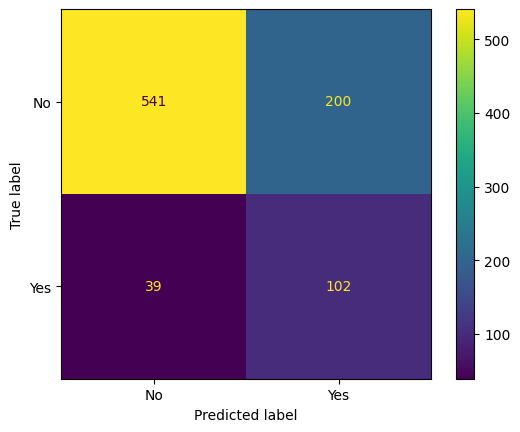

In [ ]:
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

# Matriz de confusion
cm_test= confusion_matrix(y_test, y_pred)
# Visualización de la matriz de confusion
cm_test_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = le.classes_)
cm_test_display.plot()
plt.show()

In [ ]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm_test.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precision: {precision}')
print(f'Recuperacion: {recall}')
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {especificidad}')

Precision: 0.33774834437086093
Recuperacion: 0.723404255319149
F1-score: 0.4604966139954853
Especificidad: 0.7300944669365722


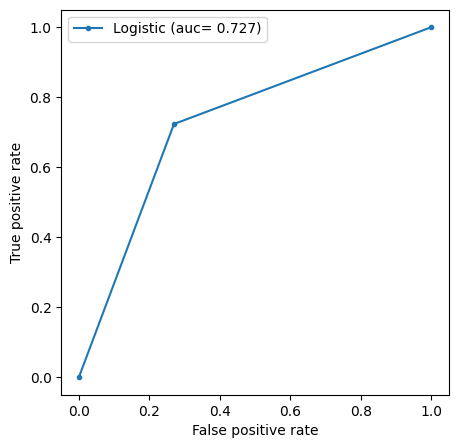

In [ ]:
#Hacemos una curva RoC y calculamos el area bajo la curva (AUC)
FP_r, TP_r, threshold=roc_curve(y_test, y_pred)
auc=auc(FP_r, TP_r)
plt.figure(figsize=(5,5))
plt.plot(FP_r, TP_r,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**Entendiendo que para la compañia es importante que el modelo prediga cuales son los empleadoa que renunciarán, se decide tener como prioridad para la escogencia del modelo idoneo la metrica de desempeño llamada ¨Recall¨, el cual mide la capacidad del modelo de identificar datos positivos.**

**Con lo anteriormente mencionado, este modelo a pesar de no tener una buena metrica de precisión, su alta recuperabilidad hace que solo 39 datos sean Falsos-Negativos, entendiendose como que de 39 empleados que SI renuncian, el modelo predice que NO renunciarán.**

#### Modelo 2: Métodos de selección de variables - Lasso

In [ ]:
# Configurar el selector de variables con Lasso
lasso_sel = SelectFromModel(Lasso(alpha=0.01),max_features=15)

# Ajustar el selector a los datos de entrenamiento
lasso_sel.fit(X_train, y_train)

# Imprimir los coeficientes del estimador Lasso
lasso_coef = lasso_sel.estimator_.coef_
print("Coeficientes del estimador Lasso:", lasso_coef)

# Obtener las variables seleccionadas
X_var = lasso_sel.get_support()
print("Variables seleccionadas:", X_var)

# Filtrar X_train y X_test para mantener solo las variables seleccionadas
X_var_train = X_train[:, X_var]
X_var_test = X_test[:, X_var]

Coeficientes del estimador Lasso: [-0.02485162 -0.         -0.          0.         -0.         -0.
 -0.         -0.03994708  0.         -0.02075378  0.13361723 -0.
 -0.          0.09646292 -0.          0.          0.         -0.
 -0.         -0.          0.02861198 -0.          0.04692306 -0.
 -0.         -0.          0.0369241   0.         -0.         -0.02394539
  0.          0.         -0.00325827  0.        ]
Variables seleccionadas: [ True False False False False False False  True False  True  True False
 False  True False False False False False False  True False  True False
 False False  True False False  True False False  True False]


Accuracy (Train): 73.41%
Accuracy (Test): 71.54%


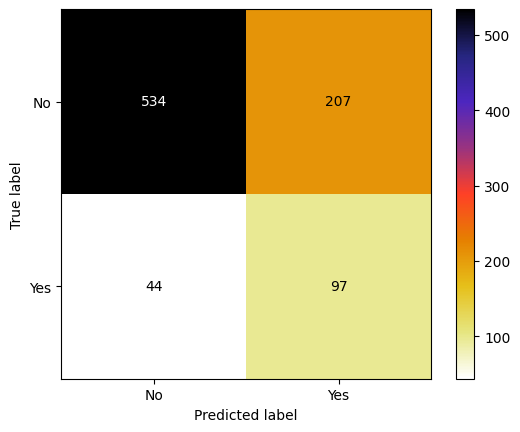

Confusion Matrix:
[[534 207]
 [ 44  97]]


In [ ]:
# Crea el modelo de regresión logística con regularización L2
regr2 = LogisticRegression(random_state=6, penalty='l2', class_weight='balanced')  # L2 es Ridge

# Calibra el modelo en los datos seleccionados por Lasso
regr2.fit(X_var_train, y_train)

# Realiza predicciones sobre el conjunto de entrenamiento
y_pred_train = regr2.predict(X_var_train)

# Exactitud del modelo en el conjunto de entrenamiento
accuracy_train = regr2.score(X_var_train, y_train)
print("Accuracy (Train): {:.2f}%".format(accuracy_train * 100))

# Realiza predicciones sobre el conjunto de prueba
y_pred_test2 = regr2.predict(X_var_test)

# Exactitud del modelo en el conjunto de prueba
accuracy_test = regr2.score(X_var_test, y_test)
print("Accuracy (Test): {:.2f}%".format(accuracy_test * 100))

# Matriz de confusión en el conjunto de prueba
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix2 = confusion_matrix(y_test, y_pred_test2, labels=regr2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2, display_labels=le.classes_)
disp.plot(cmap='CMRmap_r')
plt.show()
print("Confusion Matrix:")
print(conf_matrix2)


In [ ]:
tn, fp, fn, tp = conf_matrix2.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precision: {precision}')
print(f'Recuperacion: {recall}')
print("F1-score: ", {(2*precision*recall)/(precision+recall)})
print(f'Especificidad: {especificidad}')

Precision: 0.3190789473684211
Recuperacion: 0.6879432624113475
F1-score:  {0.4359550561797753}
Especificidad: 0.7206477732793523


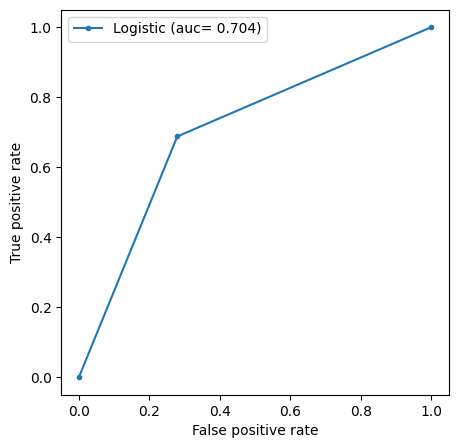

In [ ]:
from sklearn.metrics import roc_curve, auc
FP_r, TP_r, threshold=roc_curve(y_test, y_pred_test2)
auc=auc(FP_r, TP_r)
plt.figure(figsize=(5,5))
plt.plot(FP_r, TP_r,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**Teniendo en cuenta la escogencia del mejor modelo de predicción basados en la metrica de ¨Recall¨, miramos que el metodo Lasso disminuye esta metrica, haciendo que los Falsos-Negativos pasen de 39 del modelo de regresión logistica a 44 con Lasso, siendo desfavorable para la politica de selección de modelos**

**modelo2.2**

ahora cambiamos el alpha a 0.05 para mirar su comportamiento

In [ ]:
lasso_sel2 = SelectFromModel(Lasso(alpha=0.05),max_features=12)

# Ajustar el selector a los datos de entrenamiento
lasso_sel2.fit(X_train, y_train)

# Imprimir los coeficientes del estimador Lasso
lasso_coef = lasso_sel2.estimator_.coef_
print("Coeficientes del estimador Lasso:", lasso_coef)

# Obtener las variables seleccionadas
X_var2 = lasso_sel2.get_support()
print("Variables seleccionadas:", X_var)

# Filtrar X_train y X_test para mantener solo las variables seleccionadas
X_var2_train = X_train[:, X_var]
X_var2_test = X_test[:, X_var]

Coeficientes del estimador Lasso: [-0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0.  0.  0. -0.
 -0. -0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.]
Variables seleccionadas: [ True False False False False False False  True False  True  True False
 False  True False False False False False False  True False  True False
 False False  True False False  True False False  True False]


Accuracy (Train): 73.41%
Accuracy (Test): 71.54%


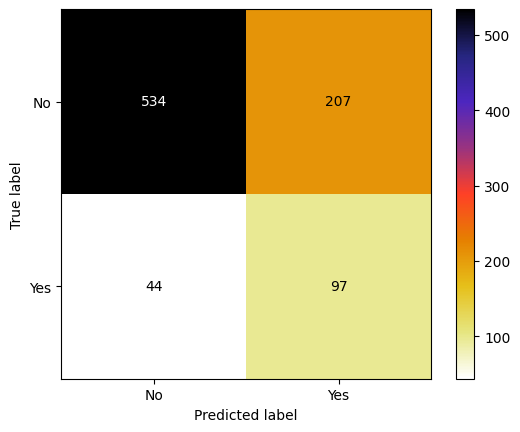

Confusion Matrix:
[[534 207]
 [ 44  97]]


In [ ]:
# Crea el modelo de regresión logística con regularización L2
regr = LogisticRegression(random_state=6, penalty='l2', class_weight='balanced')  # L2 es Ridge

# Calibra el modelo en los datos seleccionados por Lasso
regr.fit(X_var2_train, y_train)

# Realiza predicciones sobre el conjunto de entrenamiento
y_pred3_train = regr.predict(X_var2_train)

# Exactitud del modelo en el conjunto de entrenamiento
accuracy_train = regr.score(X_var2_train, y_train)
print("Accuracy (Train): {:.2f}%".format(accuracy_train * 100))

# Realiza predicciones sobre el conjunto de prueba
y_pred_test3 = regr.predict(X_var2_test)

# Exactitud del modelo en el conjunto de prueba
accuracy_test = regr.score(X_var2_test, y_test)
print("Accuracy (Test): {:.2f}%".format(accuracy_test * 100))

# Matriz de confusión en el conjunto de prueba
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred_test3, labels=regr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(cmap='CMRmap_r')
plt.show()
print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precision: {precision}')
print(f'Recuperacion: {recall}')
print("F1-score: ", {(2*precision*recall)/(precision+recall)})
print(f'Especificidad: {especificidad}')

Precision: 0.3190789473684211
Recuperacion: 0.6879432624113475
F1-score:  {0.4359550561797753}
Especificidad: 0.7206477732793523


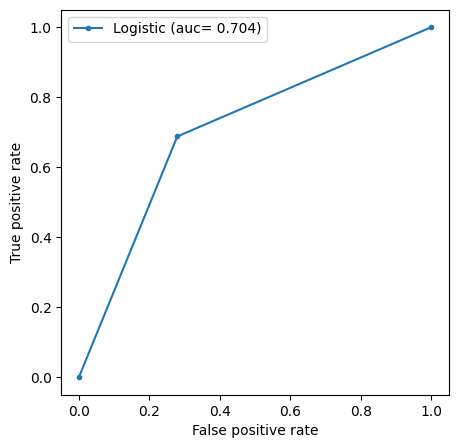

In [ ]:
from sklearn.metrics import roc_curve, auc
FP_r, TP_r, threshold=roc_curve(y_test, y_pred_test3)
auc=auc(FP_r, TP_r)
plt.figure(figsize=(5,5))
plt.plot(FP_r, TP_r,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**Comparación modelos**

**entre el modelo 2 y el modelo 2.1 el cambio en el alfa no tuvo un impacto significativo en las metricas de rendimiento ya que fueron casi identicas para ambos modelos, lo mismo para el numero de variables maximas para cada modelo no tuvieron impacto**

**modelo2.3**

In [ ]:
#modelo usando solo 4 variables para ver cambios en metricas de desempeño
# Configurar el selector de variables con Lasso
lasso_sel = SelectFromModel(Lasso(alpha=0.01), max_features=4)

# Ajustar el selector a los datos de entrenamiento
lasso_sel.fit(X_train, y_train)
# Imprimir los coeficientes del estimador Lasso
lasso_coef = lasso_sel.estimator_.coef_
print("Coeficientes del estimador Lasso:", lasso_coef)

# Obtener las variables seleccionadas
X_var1 = lasso_sel.get_support()
print("Variables seleccionadas:", X_var1)

# Filtrar X_train y X_test para mantener solo las variables seleccionadas
X_var1_train = X_train[:, X_var1]
X_var1_test = X_test[:, X_var1]

Coeficientes del estimador Lasso: [-0.02485162 -0.         -0.          0.         -0.         -0.
 -0.         -0.03994708  0.         -0.02075378  0.13361723 -0.
 -0.          0.09646292 -0.          0.          0.         -0.
 -0.         -0.          0.02861198 -0.          0.04692306 -0.
 -0.         -0.          0.0369241   0.         -0.         -0.02394539
  0.          0.         -0.00325827  0.        ]
Variables seleccionadas: [False False False False False False False  True False False  True False
 False  True False False False False False False False False  True False
 False False False False False False False False False False]


Accuracy (Train): 68.06%
Accuracy (Test): 67.91%


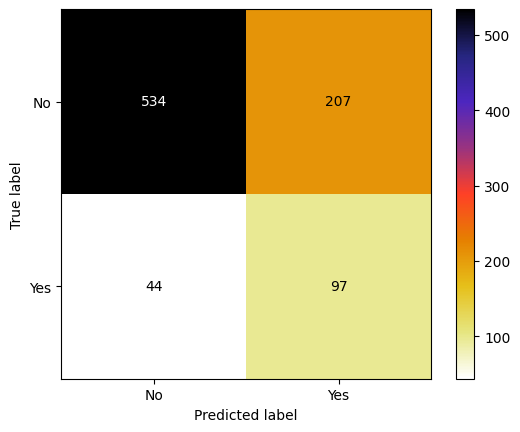

Confusion Matrix:
[[504 237]
 [ 46  95]]


In [ ]:
# Crea el modelo de regresión logística con regularización L2
regr1 = LogisticRegression(random_state=6, penalty='l2', class_weight='balanced')  # L2 es Ridge

# Calibra el modelo en los datos seleccionados por Lasso
regr1.fit(X_var1_train, y_train)

# Realiza predicciones sobre el conjunto de entrenamiento
y_pred_train = regr1.predict(X_var1_train)

# Exactitud del modelo en el conjunto de entrenamiento
accuracy_train = regr1.score(X_var1_train, y_train)
print("Accuracy (Train): {:.2f}%".format(accuracy_train * 100))

# Realiza predicciones sobre el conjunto de prueba
y_pred_test = regr1.predict(X_var1_test)

# Exactitud del modelo en el conjunto de prueba
accuracy_test = regr1.score(X_var1_test, y_test)
print("Accuracy (Test): {:.2f}%".format(accuracy_test * 100))

# Matriz de confusión en el conjunto de prueba
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrixx = confusion_matrix(y_test, y_pred_test, labels=regr1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(cmap='CMRmap_r')
plt.show()
print("Confusion Matrix:")
print(conf_matrixx)

Los datos de entrenamiento y prueba son casi similares por lo que se concluye que el modelo no esta sobreajustado

In [ ]:
tn, fp, fn, tp = conf_matrixx.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precision: {precision}')
print(f'Recuperacion: {recall}')
print("F1-score: ", {(2*precision*recall)/(precision+recall)})
print(f'Especificidad: {especificidad}')

Precision: 0.286144578313253
Recuperacion: 0.6737588652482269
F1-score:  {0.40169133192389006}
Especificidad: 0.680161943319838


Comparaciones
**El modelo 2.2 y 2.3 se han cambiado las variables maximas de 12 a 4 una diferencia alta para ver como se comportaban aun así la unica diferencia notoria fue en la precisión de los datos de entrenamiento y prueba que bajo un poco de resto es muy parecido con respecto a metricas de desempeño del modelo 2.2**

**Esta implementación del método Lasso a pesar de buscar una selección de variables basadas en modelos matematicos, hay que tener en cuenta la prioridad para la selección del modelo a través del método ¨Recall¨, estos modelos posiblemente no sean de referencia para la predicción de este caso de estudio.**

Método de selección de Variables - Prueba F y ANOVA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_total, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset, corresponden al 80,20
print("Tamaño del conjunto de entrenamiento. X: ", X_train.shape," Y: ", y_train.shape)
print("Tamaño del conjunto de validación. X: ", X_test.shape," Y: ", y_test.shape )

pipeline=ColumnTransformer([( "std_numericas",MinMaxScaler() , X_total.columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento. X:  (3528, 34)  Y:  (3528,)
Tamaño del conjunto de validación. X:  (882, 34)  Y:  (882,)


In [ ]:
fvalue_selector = SelectKBest(f_classif, k=5)
X_train_selected = fvalue_selector.fit_transform(X_train_std, y_train)

# Obtener índices de las variables seleccionadas
selected_indices = fvalue_selector.get_support(indices=True)

# Obtener nombres de las variables seleccionadas
selected_features = X_train.columns[selected_indices].tolist()

# Aplicar selección de variables al conjunto de prueba
X_test_selected = X_test.iloc[:, selected_indices]

In [ ]:
lr = LogisticRegression(random_state=0)

# Entrenar modelo con datos de entrenamiento seleccionados
lr.fit(X_train_selected, y_train)

# Hacer predicciones sobre datos de prueba seleccionados
y_pred = lr.predict(X_test_selected)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Calcular métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir resultados
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("ROC AUC Score: ", roc_auc)

Accuracy:  0.8401360544217688
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
ROC AUC Score:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Apesar de que este selector de variables Prueba F y ANOVA aplicado al modelo obtenga una exactitud del 84%, en cuanto a la precisión obtiene un desempeño nulo, indicando que identifica de manera incorrecta los casos positivos. Al no identificar correctamente los casos positivos, su Recall también tendrá un desempeño nulo, por tanto, este modelo no detectará casos positivos de manera efectiva. Este resultado también afectará el resultado del F1-Score. En cuanto al ROC AUC su resultado es de 0.5, mostrando la incapacidad del modelo para reconocer las clases positivas y negativas de los datos.**

**Esto puede darse debido a las características propias del selector de variables, ya que asume la independencia de variables y la normalidad de los datos.**

####Modelo 3: Decision Tree Classifier


In [ ]:
clf = tree.DecisionTreeClassifier(
          criterion = 'gini',
          max_depth = 6,
          max_leaf_nodes=10,
          random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=0)

In [ ]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, clf.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("Test - classification report :\n", metrics.classification_report(y_test, clf.predict(X_test)))

Train - Accuracy : 0.8645124716553289
Train - classification report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2958
           1       0.66      0.33      0.44       570

    accuracy                           0.86      3528
   macro avg       0.77      0.65      0.68      3528
weighted avg       0.85      0.86      0.85      3528

Test - Accuracy : 0.854875283446712
Test - classification report :               precision    recall  f1-score   support

           0       0.88      0.96      0.92       741
           1       0.59      0.30      0.40       141

    accuracy                           0.85       882
   macro avg       0.73      0.63      0.66       882
weighted avg       0.83      0.85      0.83       882



In [ ]:
from sklearn.metrics import recall_score
print ("Train - recall:\n", metrics.recall_score(y_train, clf.predict(X_train)))
print ("Test - recall :", metrics.recall_score(y_test, clf.predict(X_test)))

Train - recall:
 0.33157894736842103
Test - recall : 0.2978723404255319


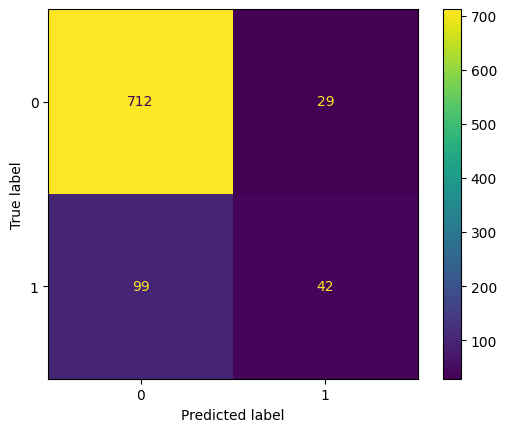

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, clf.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

Profundidad del árbol: 5
Número de nodos terminales: 10


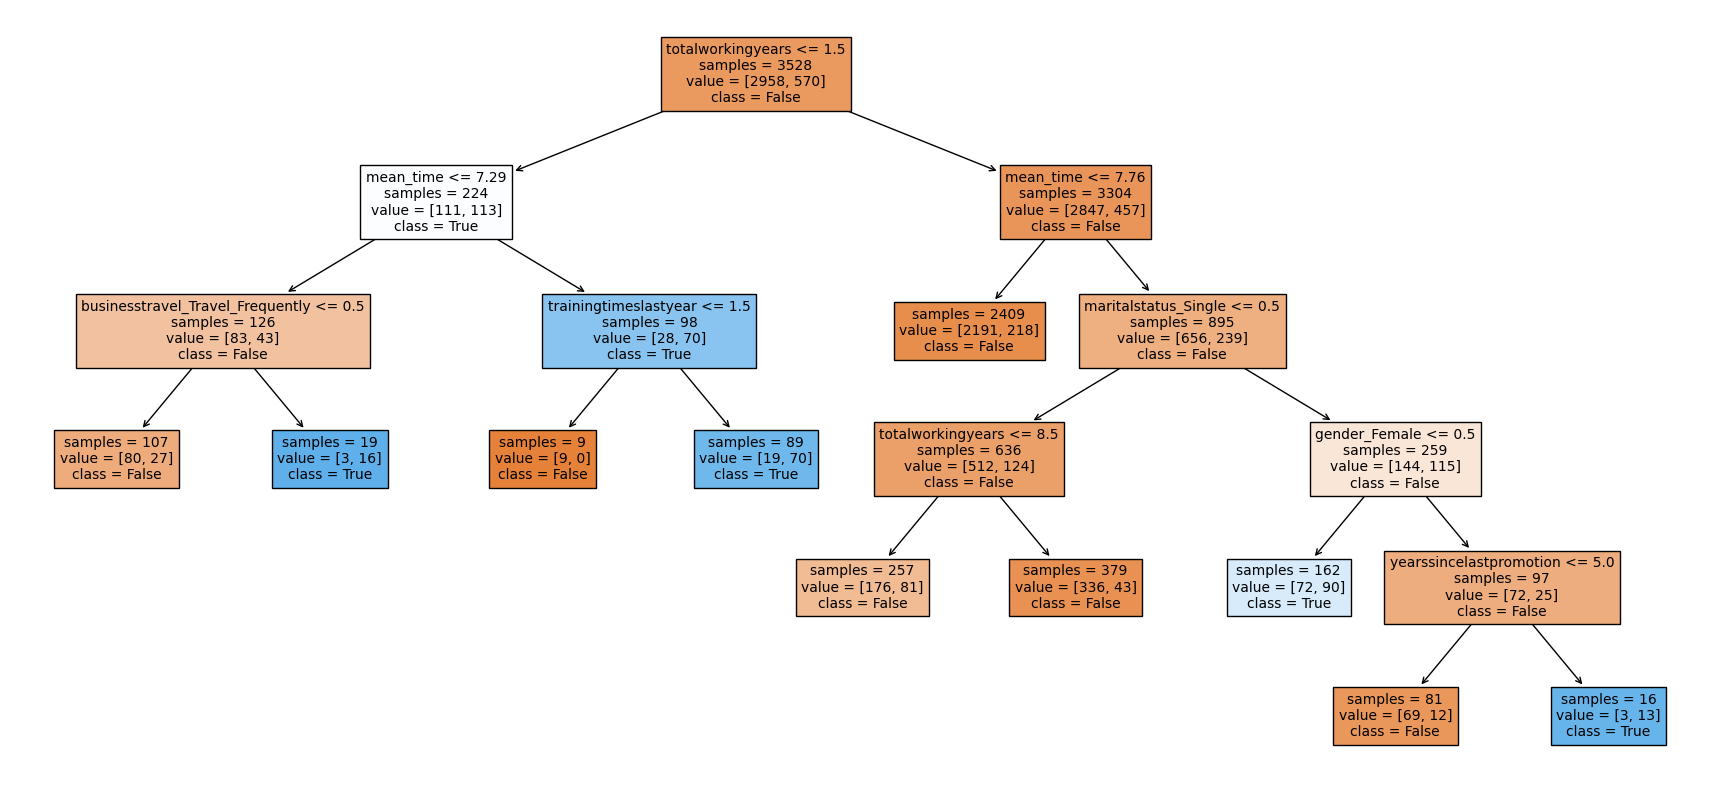

In [ ]:
# Visualización del arbol
# ==============================================================================
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names =  X_total.columns.tolist(),
            class_names   = ['False', 'True'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
tn, fp, fn, tp = cm1.ravel()

In [ ]:
# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precision: {precision}')
print(f'Recuperacion: {recall}')
print("F1-score: ", {(2*precision*recall)/(precision+recall)})
print(f'Especificidad: {especificidad}')

Precision: 0.5915492957746479
Recuperacion: 0.2978723404255319
F1-score:  {0.3962264150943396}
Especificidad: 0.9608636977058029


**Cuando se analiza la matriz de confusión se puede notar que los Falsos-Negativos son representativos con 99 datos, por lo que se podria asimilar que el modelo no es confiable. Los falsos negativos con 29 nos muestran que el modelo no predice correctamente las personas que van a renunciar a la empresa.**

**Aún así, las demás metricas obtuvieron una mejora, por tanto, se implementa un modelo de hiperparamteros para analizar el comportamiento final del modelo.**

**hiperparametros**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#definición de hiperparametros y rangos
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 8, 10, 12],  # Rangos de profundidad máxima
    'max_leaf_nodes': [10, 20, 30]  # Rangos de cantidad máxima de nodos hoja
}


In [ ]:
# Crear el modelo de árbol de decisión
clf = tree.DecisionTreeClassifier(random_state=0)

# Crear un objeto GridSearchCV para realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Utilizar el modelo con los mejores hiperparámetros
best_clf = grid_search.best_estimator_
# Evaluar el modelo en los datos de prueba
y_pred_test = best_clf.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
classification_report_test = metrics.classification_report(y_test, y_pred_test)
recall_test = metrics.recall_score(y_test, y_pred_test)
c_m_test = confusion_matrix(y_test, y_pred_test)


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 30}


In [ ]:
# Mostrar resultados
print("Test - Accuracy:", accuracy_test)
print("Test - Classification Report:\n", classification_report_test)
print("Test - Recall:", recall_test)



Test - Accuracy: 0.8775510204081632
Test - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       741
           1       0.68      0.44      0.53       141

    accuracy                           0.88       882
   macro avg       0.79      0.70      0.73       882
weighted avg       0.87      0.88      0.87       882

Test - Recall: 0.4397163120567376


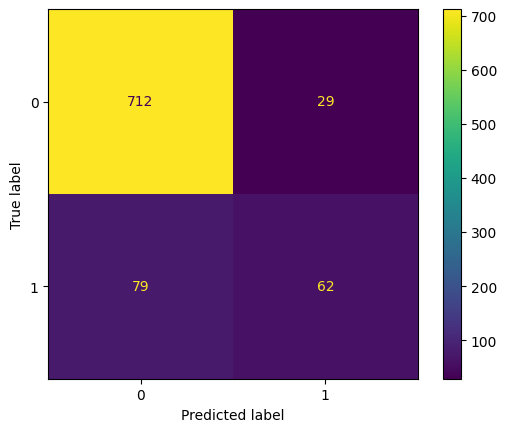

In [ ]:
# Visualizar la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_m_test)
cm_display.plot()

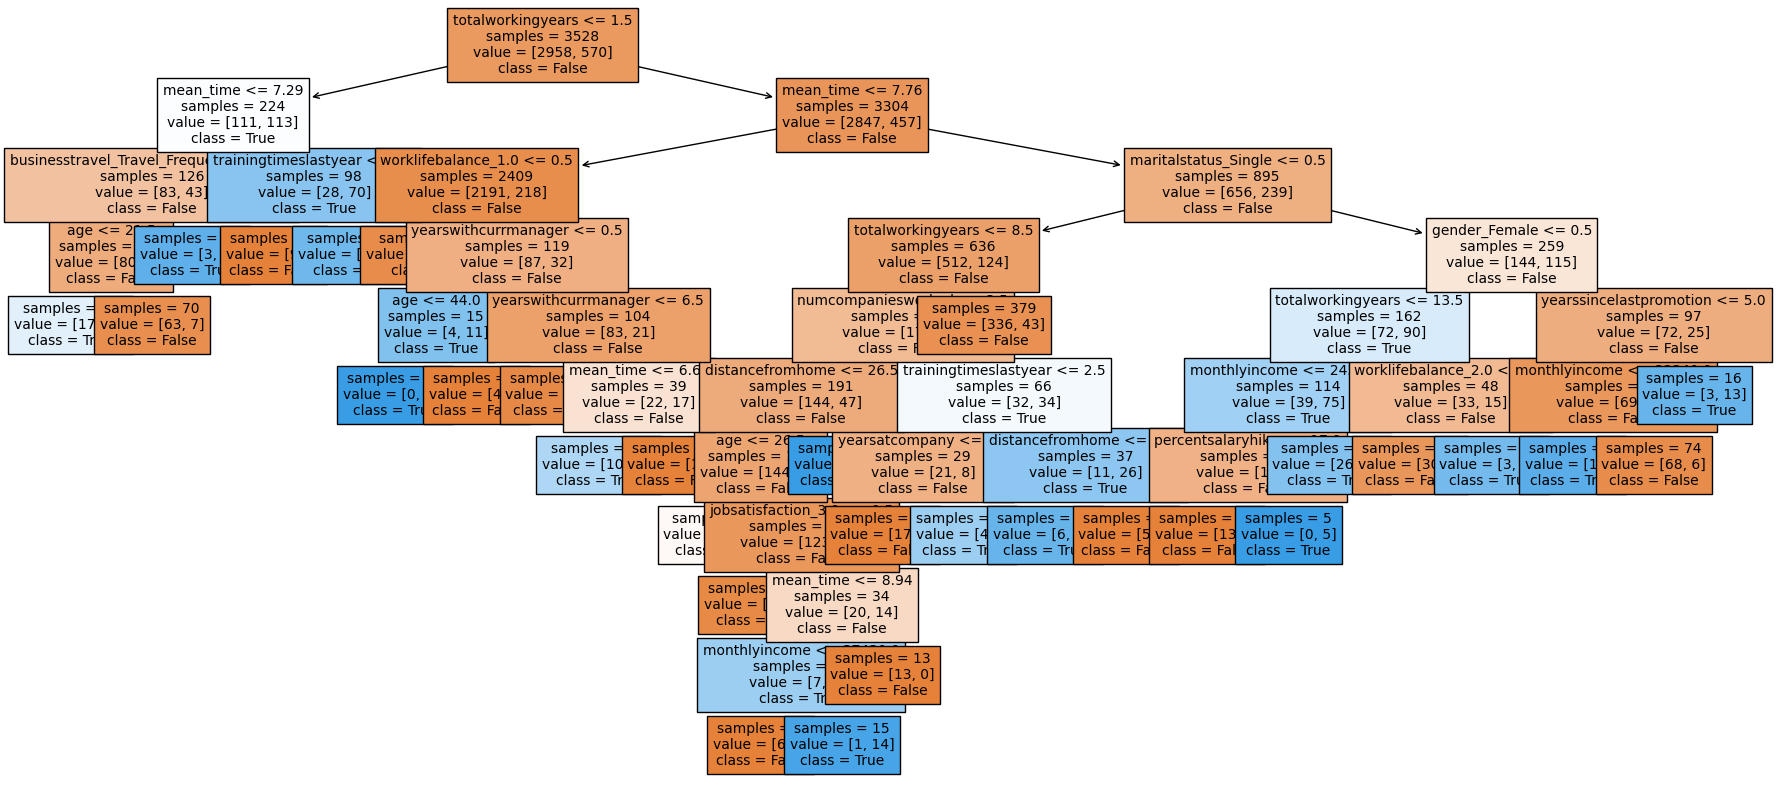

In [ ]:
# Crear una figura y un eje para la visualización del árbol
fig, ax = plt.subplots(figsize=(22, 10))

# Visualizar el árbol de decisión
plot = plot_tree(
    decision_tree=best_clf,
    feature_names=X_total.columns.tolist(),
    class_names=['False', 'True'],
    filled=True,
    impurity=False,
    fontsize=10,
    precision=2,
    ax=ax
)

# Mostrar el gráfico del árbol
plt.show()

In [ ]:
tn, fp, fn, tp = c_m_test.ravel()

# Cálculo de métricas
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = (2 * precision * recall) / (precision + recall)
especificidad = tn / (fp + tn)

# Imprimir métricas
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1_score}')
print(f'Especificidad: {especificidad}')

Precision: 0.6813186813186813
Recall: 0.4397163120567376
F1-score: 0.5344827586206897
Especificidad: 0.9608636977058029


Ya aplicados los hiperparametros, la primera diferencia es el arbol que arrojó el modelo con los mejores hiperparametros y sus metricas de desempeño tuvieron una mejora, la primera es que parece haber un equilibrio entre la recuperaciòn y a precisiòn lo que se puede ver como la primera mejora, ademas la precisiòn subió, por lo que el modelo tiene un buen rendimiento clasificando los casos  positivos y su alta especificidad muestra que esta detectando bien los casos negativos.

**CONLUSIONES GENERALES DEL CASO DE ESTUDIO**



A continuación, se postularán las conclusiones más importantes de este estudio.

•	Se evidencia que el modelo de regresión logística sin ningún selector es el de mayor recall lo que puede hacer pensar que es el mejor debido a que lo que se busca es que el modelo tenga la menor cantidad de falsos negativos ya que predecir que un empleado no va a renunciar cuando en realidad sí lo va a hacer, es mucho más grave que el caso contrario.

•	Los selectores como Lasso y Prueba F y ANOVA no significaron grandes mejores dentro del modelo por lo que su exclusión es inminente.

•	Aunque el Decision Tree Classifier disminuyó el recall significativamente con relación al modelo de RL, puede representar un buen modelo para el caso de estudio ya que mejora un poco las otras métricas.

•	El Decision Tree Classifier con tuneo de hiperparámetros puede resultar como el mejor modelo si se toman las métricas en aspectos generales ya que, aunque disminuyó la métrica más importante para nuestro estudio como lo es el recall, aumentó todas las otras significativamente dejando como referencia que este es un modelo que se podría abarcar con mayor hincapié para conseguir unas métricas mucho más altas en futuros estudios.
